## CSV file import for Variable Air Volume (VAV) Air Handling Unit (AHU) Tutorial 
* Run all faults individually
* Future versions may require BRICK model
* updated 8/28/24
* dataset is available here: https://drive.google.com/file/d/1QiBR8oJHSS7a8q__ip5Gm1rA2cO9MQ2M/view?usp=sharing

1. Install py package from PyPI

## `MissingColumnError` and `InvalidParameterError`
This workbook guides you through running fault conditions one at a time and also demonstrates **Error Exception Handling** in Python. This feature is used within open-fdd to manage cases where incorrect parameters or Pandas DataFrame column names are passed to the fault equations. Any errors you see in the code below are intentional, designed to help with troubleshooting.

In [1]:
# Install necessary packages

In [2]:
# pip install open-fdd --upgrade

In [3]:
import pandas as pd
import numpy as np


BAS screenshots just for reference. This AHU is interesting where it appears to have two discharge air ducts and also air flow measuring stations (AFMS) and no heating coil but technically a reheat coil downstream from the fan. Also this AHU has an ERV where we should use caution on the min OA damper position input setting. 

## TODO future deep divces

* See git issue about how to handle an ERV and do analysis on that
* See git issue on fault equation 6 which should be revised for an AHU that has no heating coil

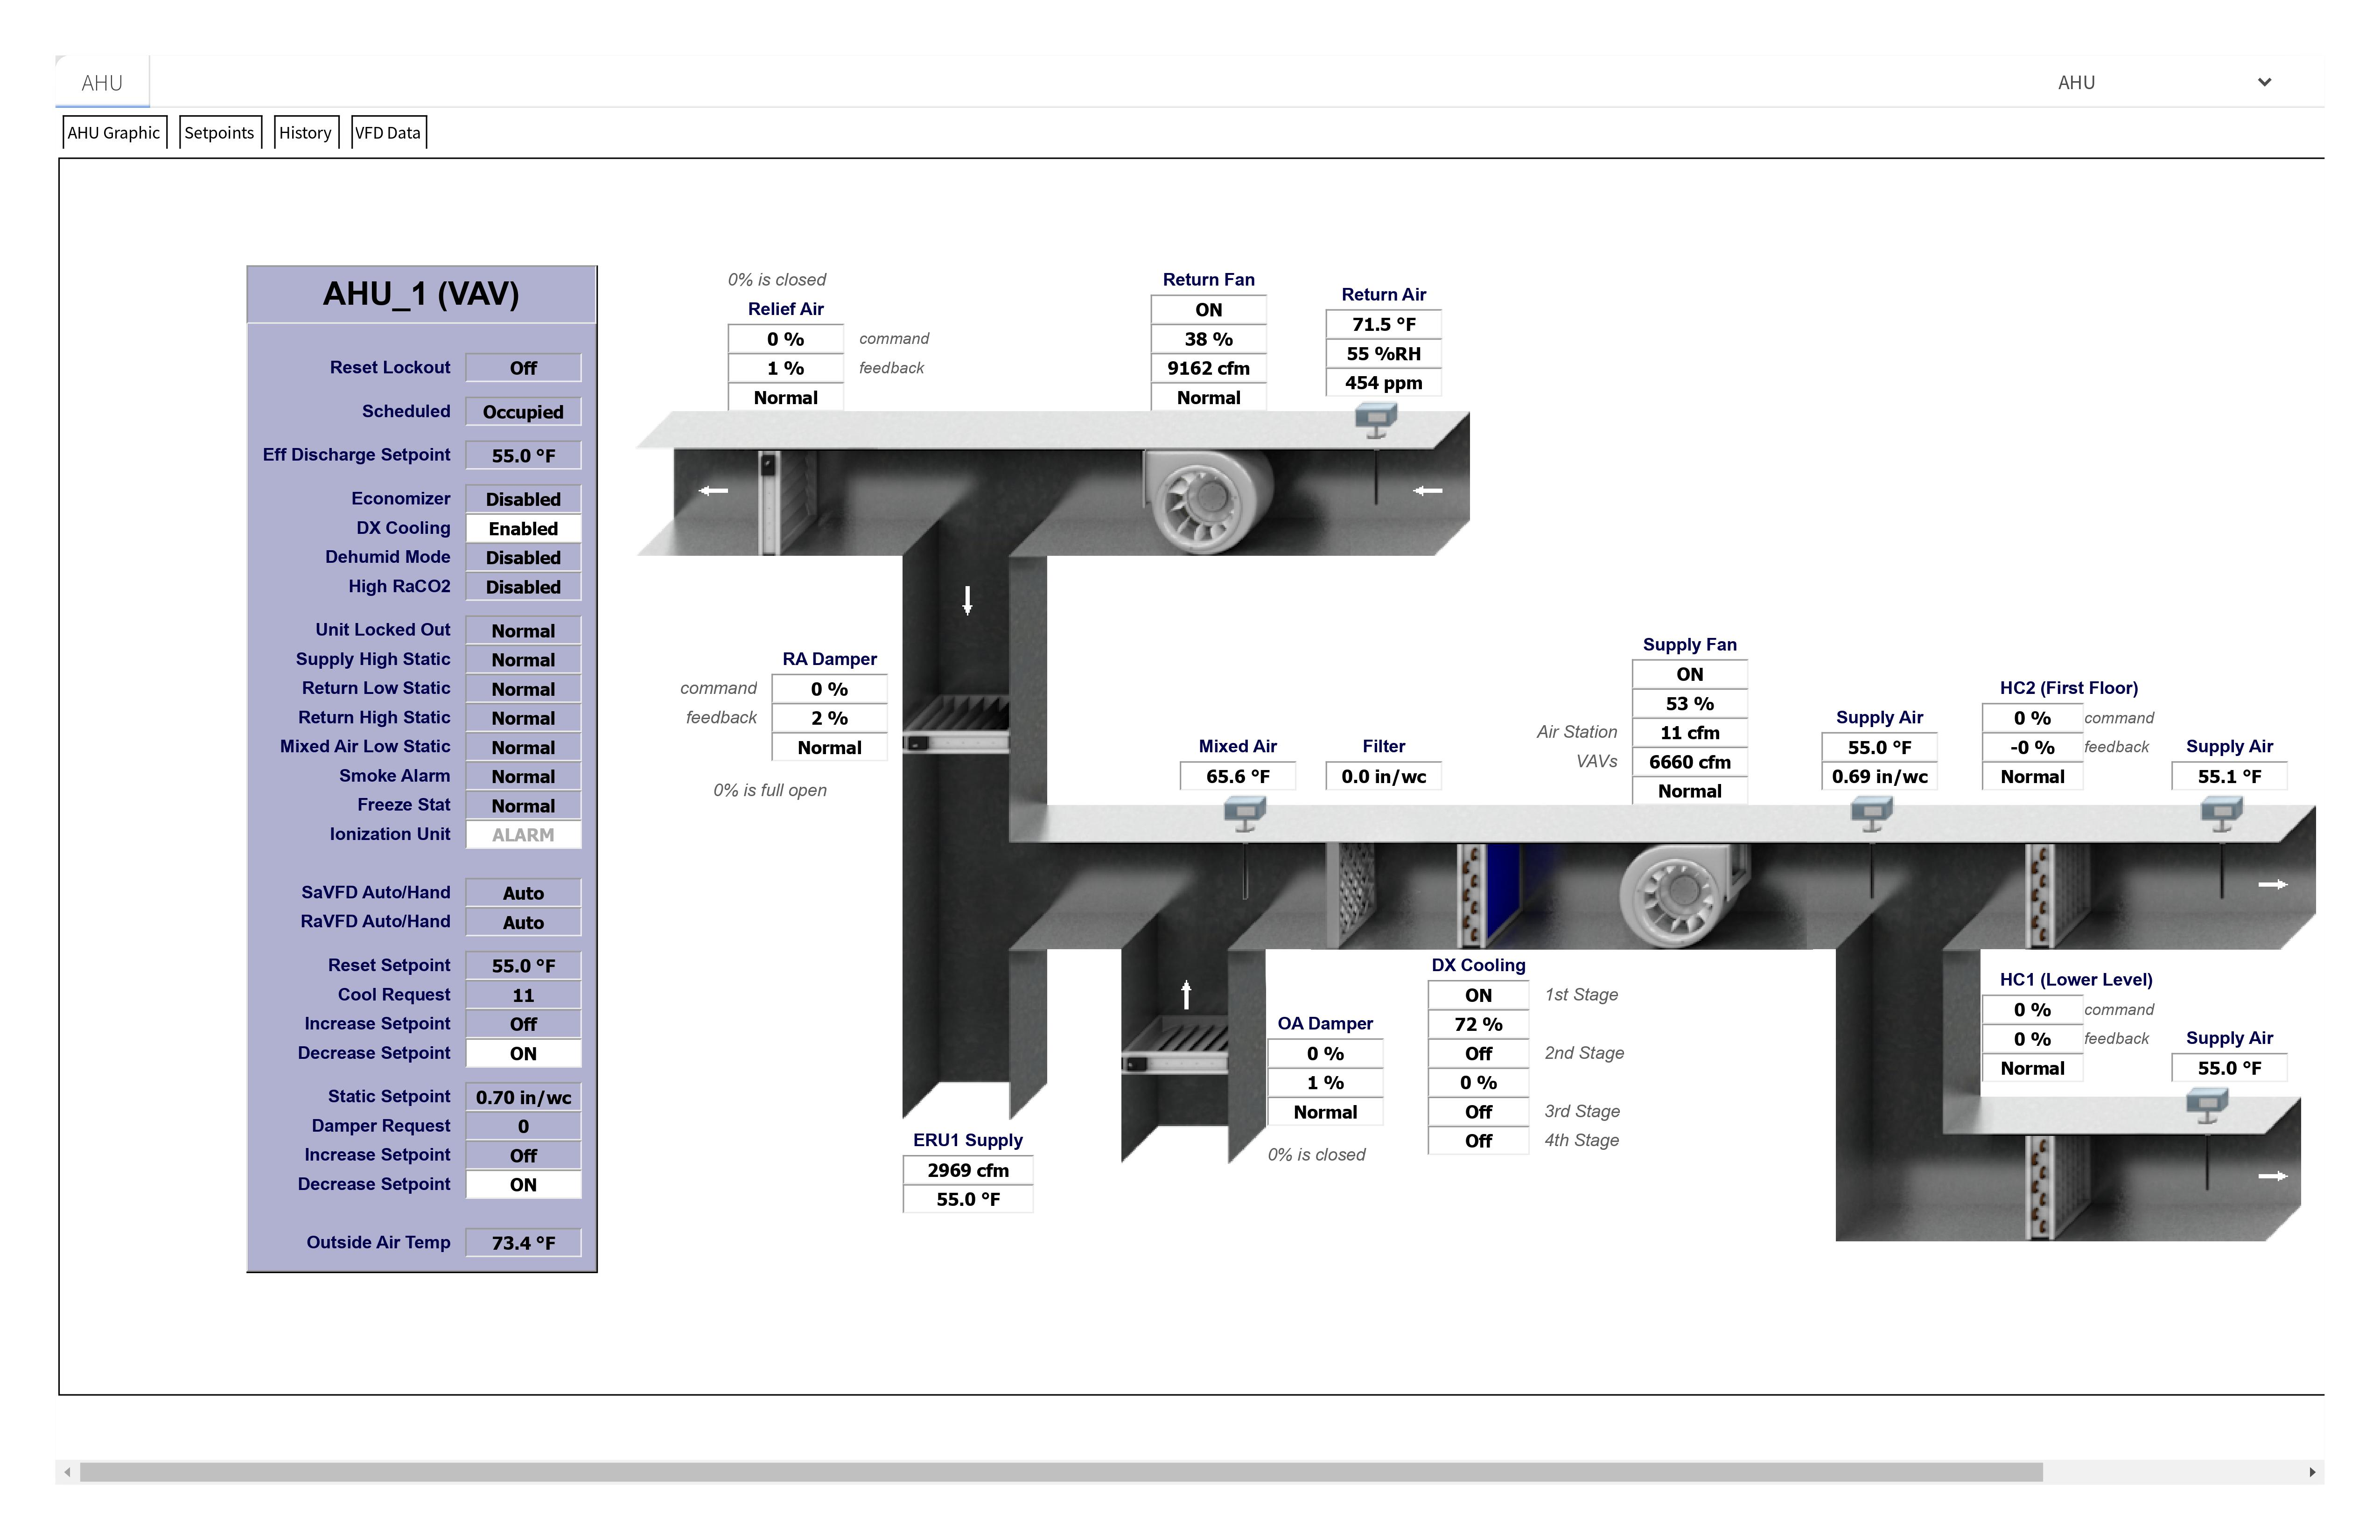

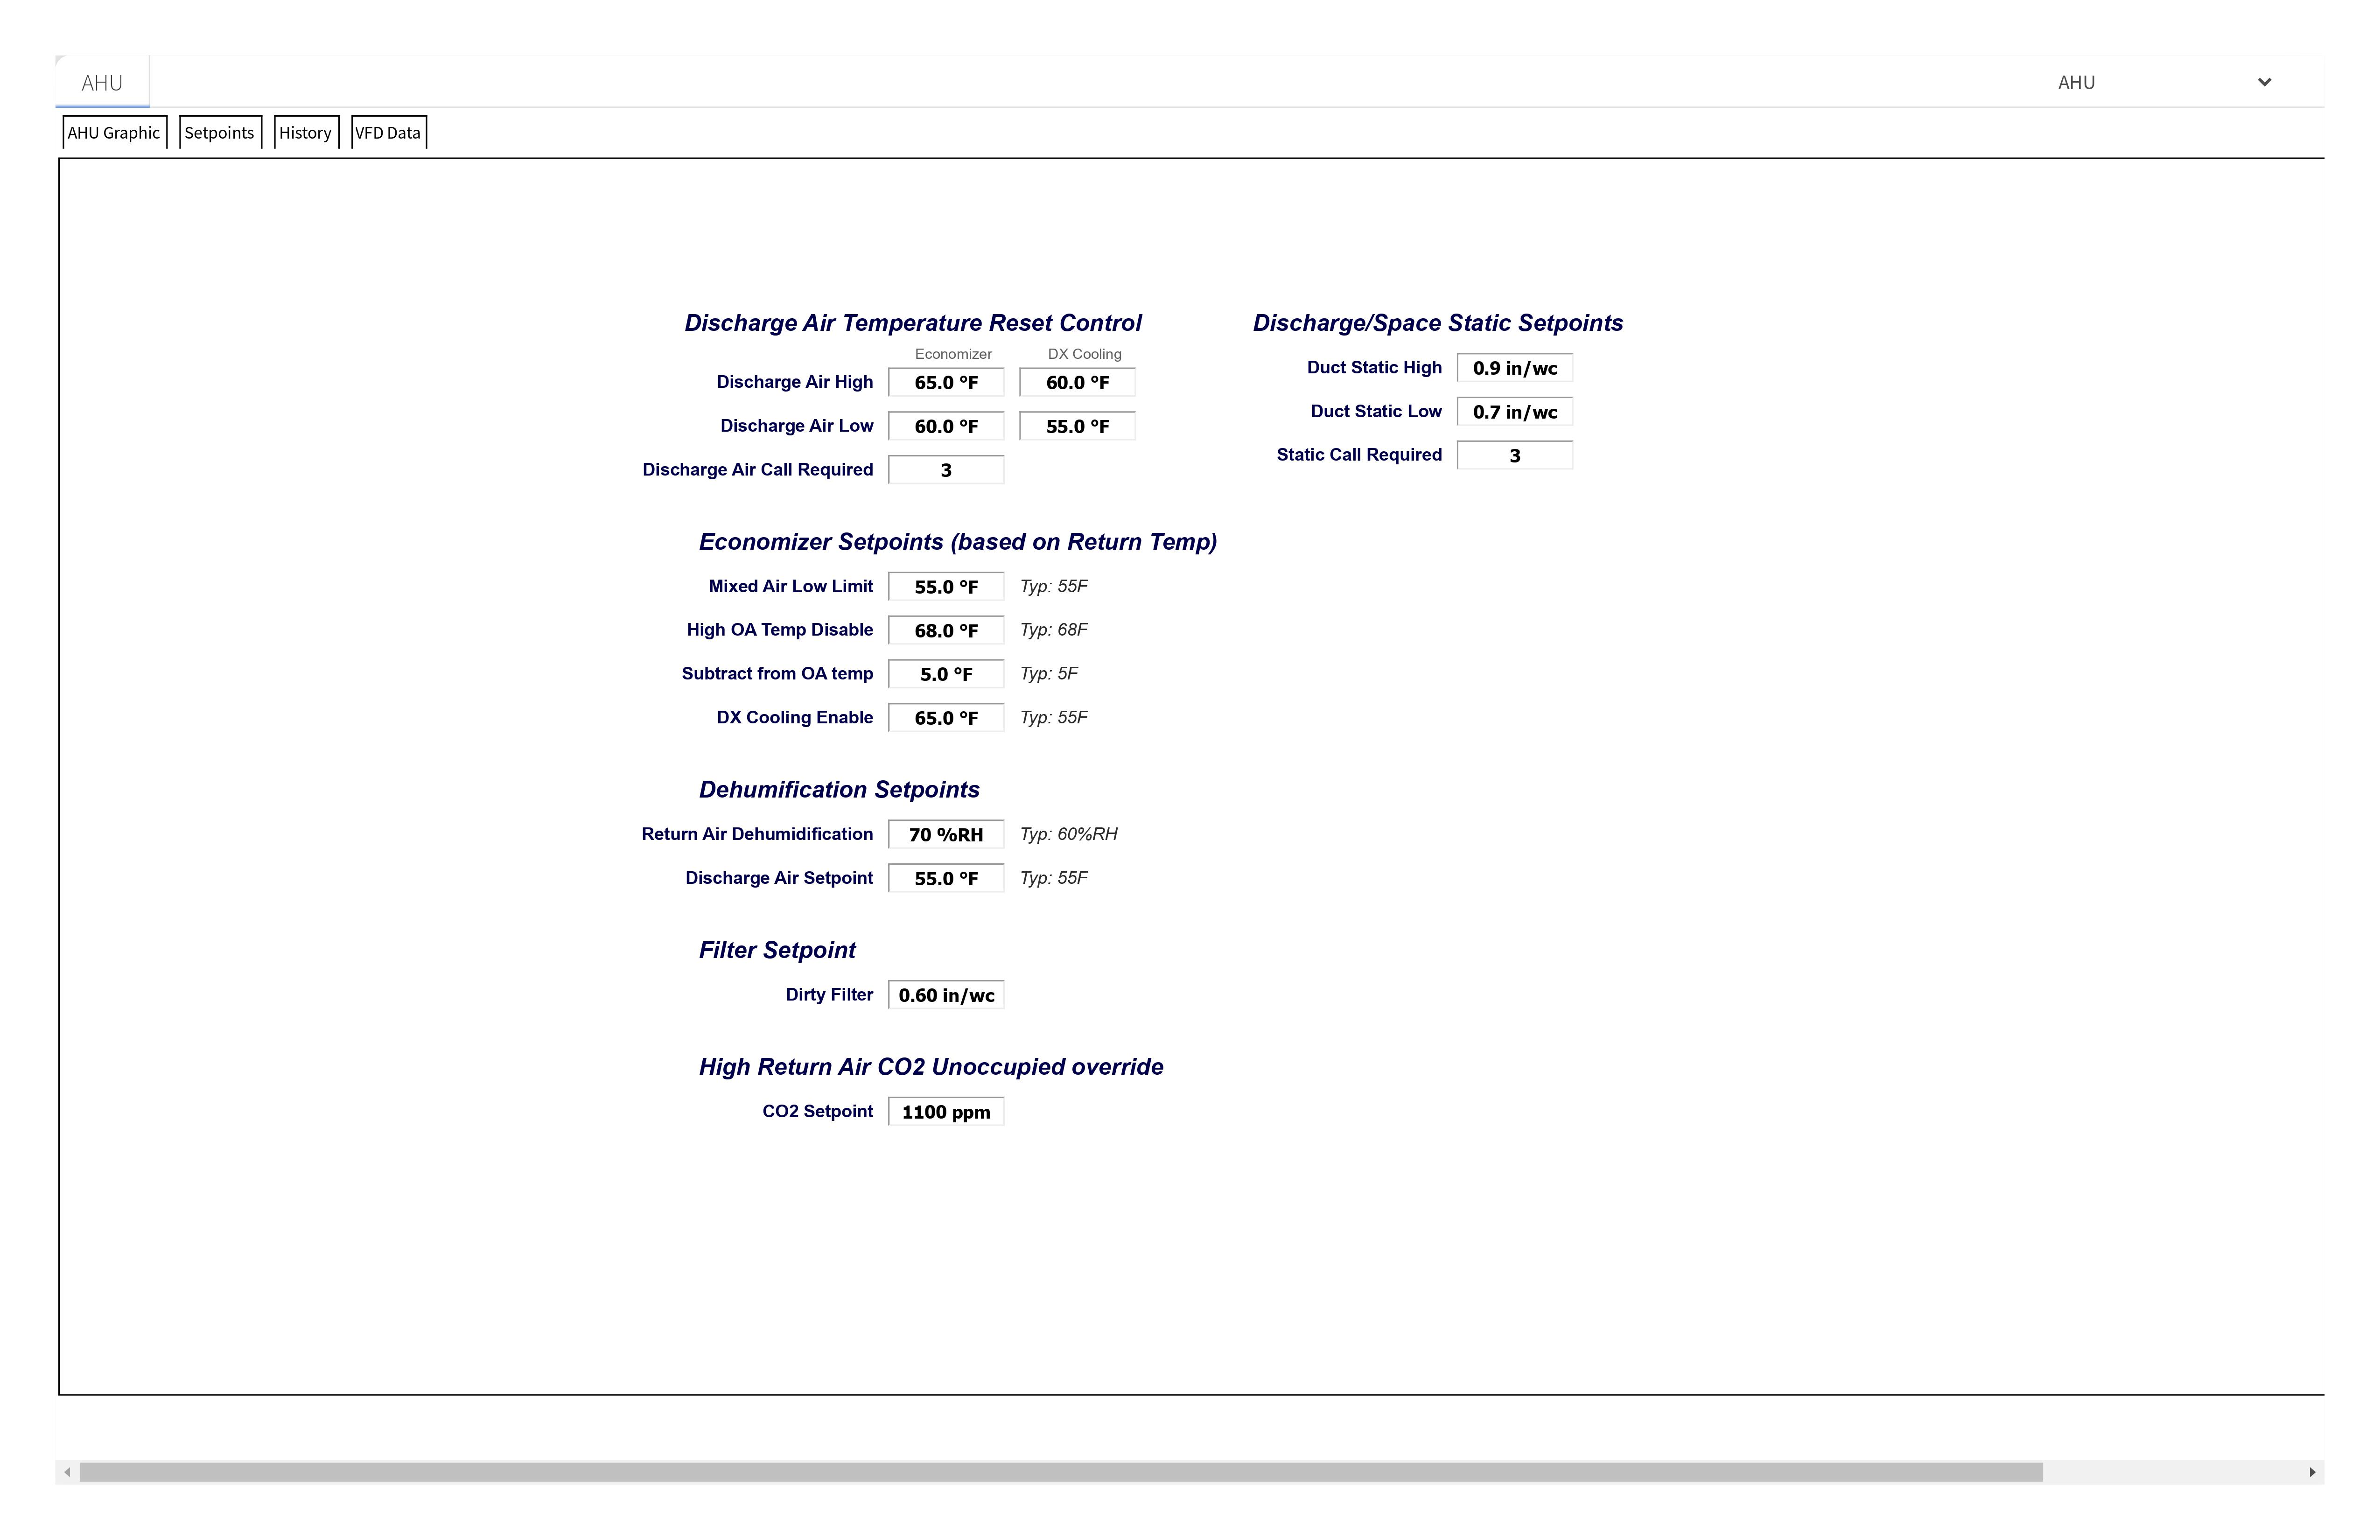

In [4]:
from IPython.display import Image, display

# Specify the path to your JPEG file
image_path1 = r"C:\Users\bbartling\Documents\AHU.jpg"
image_path2 = r"C:\Users\bbartling\Documents\AHU_points.jpg"

# Display the images
display(Image(filename=image_path1))
display(Image(filename=image_path2))

Load data into a Pandas DataFrame
* This data has some chiller/boiler system inlet outlet temps, a few building zone temps, and is mostly AHU data

In [5]:
# Load your data
ahu_data = r"C:\Users\bbartling\Documents\data.csv"
df = pd.read_csv(ahu_data)

df.head()

,timestamp,HWS_Blr1,HWS_Blr2,Pump_Speed,Bypass_Valve,Bypass_Valve_Feedback,HWS_Temp,Oa_Temp,Eff_DP_SP,HWR_Temp,...,Freq1,ActiveEnergyDelvd,PowerFactor,Voltage_L_N,Voltage_L_L,Current,B008_SpaceTemp,TAB_103_SpaceTemp,TAB_115_SpaceTemp,TAB_125_SpaceTemp
0,2023-10-01 00:00:00,78.34,85.02,45.0,100.0,99.07,77.57,71.42,5.0,78.88,...,0.0,0.0,0.0,0.0,0.0,0.0,70.06,68.21,68.89,69.46
1,2023-10-01 00:05:00,78.33,84.97,45.0,100.0,99.08,77.52,71.39,5.0,78.86,...,0.0,0.0,0.0,0.0,0.0,0.0,70.06,68.21,68.89,69.46
2,2023-10-01 00:10:00,78.33,84.97,45.0,100.0,99.08,77.52,71.39,5.0,78.86,...,0.0,0.0,0.0,0.0,0.0,0.0,70.06,68.21,68.89,69.46
3,2023-10-01 00:15:00,78.31,84.93,45.0,100.0,99.08,77.48,71.42,5.0,78.80,...,0.0,0.0,0.0,0.0,0.0,0.0,70.06,68.21,68.89,69.46
4,2023-10-01 00:20:00,78.30,84.88,45.0,100.0,99.08,77.44,71.52,5.0,78.79,...,0.0,0.0,0.0,0.0,0.0,0.0,70.06,68.21,68.89,69.46


In [6]:
# Convert the timestamp column to datetime and set it as the index
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index("timestamp", inplace=True)

df.head()

,HWS_Blr1,HWS_Blr2,Pump_Speed,Bypass_Valve,Bypass_Valve_Feedback,HWS_Temp,Oa_Temp,Eff_DP_SP,HWR_Temp,Flow_Meter,...,Freq1,ActiveEnergyDelvd,PowerFactor,Voltage_L_N,Voltage_L_L,Current,B008_SpaceTemp,TAB_103_SpaceTemp,TAB_115_SpaceTemp,TAB_125_SpaceTemp
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-10-01 00:00:00,78.34,85.02,45.0,100.0,99.07,77.57,71.42,5.0,78.88,0.53,...,0.0,0.0,0.0,0.0,0.0,0.0,70.06,68.21,68.89,69.46
2023-10-01 00:05:00,78.33,84.97,45.0,100.0,99.08,77.52,71.39,5.0,78.86,0.53,...,0.0,0.0,0.0,0.0,0.0,0.0,70.06,68.21,68.89,69.46
2023-10-01 00:10:00,78.33,84.97,45.0,100.0,99.08,77.52,71.39,5.0,78.86,0.53,...,0.0,0.0,0.0,0.0,0.0,0.0,70.06,68.21,68.89,69.46
2023-10-01 00:15:00,78.31,84.93,45.0,100.0,99.08,77.48,71.42,5.0,78.80,0.53,...,0.0,0.0,0.0,0.0,0.0,0.0,70.06,68.21,68.89,69.46
2023-10-01 00:20:00,78.30,84.88,45.0,100.0,99.08,77.44,71.52,5.0,78.79,0.53,...,0.0,0.0,0.0,0.0,0.0,0.0,70.06,68.21,68.89,69.46


Open-fdd also includes a method to apply rolling averages to your data if necessary. ASHRAE recommends using 1-minute sampled data for 5-minute rolling averages, but you can skip this step, as the method will automatically handle cases where the data is not sampled at 1 minute or less. Refer to the print statements or `warnings` to see how the data is affected.

You can also specify the rolling average interval when using the method, which operates as described under the hood. While ASHRAE recommends 5-minute rolling averages on 1-minute data, obtaining such data can sometimes be challenging.

```python
def apply_rolling_average_if_needed(self, df, freq="1min", rolling_window="5min")
```

You can view the method here if desired.
https://github.com/bbartling/open-fdd/blob/master/open_fdd/air_handling_unit/faults/shared_utils.py#L45


In [7]:
from open_fdd.air_handling_unit.faults.helper_utils import HelperUtils

utils = HelperUtils()

df = utils.apply_rolling_average_if_needed(df)

Check your data frame for empty cell or NaNs


In [8]:
# Check for NaN values in each column
for col in df.columns:
    if df[col].isnull().any():
        print(f"NaN values found in column: {col}")

        # Remove rows with any NaN values, then forward and backfill
        df = df.dropna().ffill().bfill()
        print("DataFrame has been cleaned for NaNs and has also been forward and backfilled.")

In [9]:
df.columns

Index(['HWS_Blr1', 'HWS_Blr2', 'Pump_Speed', 'Bypass_Valve',
       'Bypass_Valve_Feedback', 'HWS_Temp', 'Oa_Temp', 'Eff_DP_SP', 'HWR_Temp',
       'Flow_Meter', 'HWS_Eff_SP', 'Blr_SP', 'HWS_High_SP', 'HWS_Low_SP',
       'Wet_DP', 'Eff_Bypass_SP', 'Blr1_Firing_Rate', 'Blr2_Firing_Rate',
       'SA_FanVFD', 'EA_FanVFD', 'WheelSpeed', 'DaTemp', 'DX1', 'DX2',
       'EA_DuctSPt', 'SA_Flow', 'EFF_SaCFM', 'DuctStatic', 'PreCoolTemp',
       'PreCoolHumidity', 'OaTemp', 'CoolCall_In', 'DX_OA_Enable_SP',
       'DischargeTemp', 'EA_DamperFB', 'EA_Damper', 'EconHiOASPt', 'EffDaSP',
       'Eff_DaTempSP', 'HC1_DaTemp', 'HC1_VlvFB', 'HC2_DaTemp', 'HC2_VlvFB',
       'MA_Temp', 'OA_DamperFB', 'RA_Humidity', 'RA_Flow_SP', 'RA_Flow',
       'RA_FanSpeed', 'RA_Damper_FB', 'RA_CO2_SP', 'OA_RA_Damper',
       'VAV_CFM_Total', 'Static_SP', 'SaStatic', 'SA_Flow_CFM', 'SA_FanSpeed',
       'RA_CO2', 'RA_Temp', 'Freq', 'ActivePower', 'ApparentPower',
       'ReactivePower', 'Freq1', 'ActiveEnergyDelvd', 

This code snippet attempts to determine the minimum position of the outside air damper, which is a critical input for the analysis. It’s important to note that this AHU includes an Energy Recovery Ventilator (ERV), which may impact the accuracy of this determination. AHUs equipped with ERVs might not have a standard 'minimum outside air' position. Additionally, when using rule-based FDD (Fault Detection and Diagnostics) on systems with ERVs, there is an increased risk of encountering false positives, particularly when the mixing temperatures are influenced by the energy recovery wheel.

In [10]:
# Filter the DataFrame
filtered_df = df[(df['SA_FanSpeed'] > 15.0) & (df['Oa_Temp'] < 10.0)]

# Get the description of the 'OA_Damper' column
oa_damper_description = filtered_df['OA_RA_Damper'].describe()

# Print the description
oa_damper_description

count    1880.000000
mean        9.202298
std        11.711833
min         0.000000
25%         0.000000
50%         6.550000
75%        13.680000
max       100.000000
Name: OA_RA_Damper, dtype: float64

In [11]:
# Checking data types of each column
print("Data Types:")
print(df.dtypes)

Data Types:
HWS_Blr1                 float64
HWS_Blr2                 float64
Pump_Speed               float64
Bypass_Valve             float64
Bypass_Valve_Feedback    float64
                          ...   
Current                  float64
B008_SpaceTemp           float64
TAB_103_SpaceTemp        float64
TAB_115_SpaceTemp        float64
TAB_125_SpaceTemp        float64
Length: 73, dtype: object


In [12]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print("\nMax Values:")
    print(df.max(numeric_only=True))


Max Values:
HWS_Blr1                    142.41
HWS_Blr2                    141.92
Pump_Speed                   93.38
Bypass_Valve                100.00
Bypass_Valve_Feedback        99.60
HWS_Temp                    148.36
Oa_Temp                      94.87
Eff_DP_SP                     5.00
HWR_Temp                    139.38
Flow_Meter                   26.25
HWS_Eff_SP                  145.00
Blr_SP                       68.89
HWS_High_SP                 140.00
HWS_Low_SP                  100.00
Wet_DP                        9.57
Eff_Bypass_SP                10.00
Blr1_Firing_Rate             89.00
Blr2_Firing_Rate             85.00
SA_FanVFD                   100.00
EA_FanVFD                   100.00
WheelSpeed                  100.00
DaTemp                       72.87
DX1                         100.00
DX2                         100.00
EA_DuctSPt                    0.60
SA_Flow                    3021.26
EFF_SaCFM                  3000.00
DuctStatic                    0.76
PreCool

This AHU, as observed in the screenshot, features DX cooling controlled by an analog signal, likely indicating a variable-capacity scroll compressor rather than a binary staged compressor. Open-fdd faults, when calculating operating modes, require a cooling signal to identify when the AHU is in a cooling mode. The code snippet below calculates a `cooling_signal` as a Pandas series, with values ranging from 0.0 to 1.0 to represent the percentage command of the analog output.

The calculations might seem unconventional, but they are designed to provide the rule-based logic with an appropriate 'mode' for the AHU based on the DX cooling signals. This calculation ensures that when the DX cooling is active, the AHU is correctly identified as being in a cooling mode. Additionally, some faults check whether the cooling signal is at 100% but there's insufficient drop in the AHU supply air temperature to flag a fault. This calculation ensures that the `cooling_signal` will approach 1.0 or 100% when the DX cooling is fully engaged but not achieving the setpoint.

In [13]:
# Step 1: Convert DX1 and DX2 to analog signals
df['DX1_analog'] = df['DX1'] / 100.0  # DX1 is already 0.5 when DX1 is 100
df['DX2_analog'] = df['DX2'] / 100.0  # DX2 scales from 0.0 to 1.0

# Step 2: Create cooling_signal
df['cooling_signal'] = df['DX1_analog'] * 0.5 + df['DX2_analog'] * 0.5

# Optional: Drop the intermediate columns if not needed
df = df.drop(columns=['DX1_analog', 'DX2_analog'])

# View the resulting DataFrame
print(df[['DX1', 'DX2', 'cooling_signal']])

                        DX1    DX2  cooling_signal
timestamp                                         
2023-10-01 00:00:00  100.00  14.05         0.57025
2023-10-01 00:05:00  100.00  22.61         0.61305
2023-10-01 00:10:00  100.00  23.33         0.61665
2023-10-01 00:15:00  100.00  38.41         0.69205
2023-10-01 00:20:00  100.00  38.41         0.69205
...                     ...    ...             ...
2024-07-31 23:35:00    0.00   0.00         0.00000
2024-07-31 23:40:00   72.43   0.00         0.36215
2024-07-31 23:45:00   74.15   0.00         0.37075
2024-07-31 23:50:00   74.05   0.00         0.37025
2024-07-31 23:55:00    0.00   0.00         0.00000

[105589 rows x 3 columns]


### Caveat on Analog Output Data which would be a unit in percent command or position

As seen above printing the max values, please check columns that represent float values ranging from 0 to 100.0 for the control system's analog outputs. Open-fdd expects these values to be in the range of 0 to 1.0 to represent percentages. Some control system data is provided as 0 to 100.0, while others are in the 0 to 1.0 range. If you pass a 0 to 100.0 value for the control system's analog outputs, the check_analog_pct method will flag this as a `ValueError`. This method checks the data type and range of these values, raising an error if the maximum value exceeds 1.0, ensuring that the data conforms to the expected format. Under the hood logic monitors analog outputs to know the operating state (OS) of the AHU based on heating, cooling, and economizer percent commands as well as supply fan speed reference to know when the AHU is running. ASHRAE and NIST use operating states 0, 1, 2, 3 to represent AHU in a heating mode, economizer, economizer plus mechanical cooling, and mechanical cooling only modes.

```python
SA_FanVFD                   100.00
OA_RA_Damper                100.00
SA_FanSpeed                  80.25
```

In [14]:
# convert only the AHU data

# the floats between 0.0 and 100.0 so we need to convert to 0.0 and 1.0 ranges
percentage_columns = [
    ["SA_FanVFD"],
    ["OA_RA_Damper"],
    ["SA_FanSpeed"],
]

for col in percentage_columns:
    df[col] = df[col] / 100.0

df.head()

,HWS_Blr1,HWS_Blr2,Pump_Speed,Bypass_Valve,Bypass_Valve_Feedback,HWS_Temp,Oa_Temp,Eff_DP_SP,HWR_Temp,Flow_Meter,...,ActiveEnergyDelvd,PowerFactor,Voltage_L_N,Voltage_L_L,Current,B008_SpaceTemp,TAB_103_SpaceTemp,TAB_115_SpaceTemp,TAB_125_SpaceTemp,cooling_signal
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-10-01 00:00:00,78.34,85.02,45.0,100.0,99.07,77.57,71.42,5.0,78.88,0.53,...,0.0,0.0,0.0,0.0,0.0,70.06,68.21,68.89,69.46,0.57025
2023-10-01 00:05:00,78.33,84.97,45.0,100.0,99.08,77.52,71.39,5.0,78.86,0.53,...,0.0,0.0,0.0,0.0,0.0,70.06,68.21,68.89,69.46,0.61305
2023-10-01 00:10:00,78.33,84.97,45.0,100.0,99.08,77.52,71.39,5.0,78.86,0.53,...,0.0,0.0,0.0,0.0,0.0,70.06,68.21,68.89,69.46,0.61665
2023-10-01 00:15:00,78.31,84.93,45.0,100.0,99.08,77.48,71.42,5.0,78.80,0.53,...,0.0,0.0,0.0,0.0,0.0,70.06,68.21,68.89,69.46,0.69205
2023-10-01 00:20:00,78.30,84.88,45.0,100.0,99.08,77.44,71.52,5.0,78.79,0.53,...,0.0,0.0,0.0,0.0,0.0,70.06,68.21,68.89,69.46,0.69205


Set the time stamp column as the Pandas DataFrame Index

## Setup the config dict

This Python dictionary stores column names from the Pandas DataFrame along with tuning parameters for the fault logic equations. For more information, please refer to the `air_handling_unit` README on GitHub, specifically under the section titled 'Tutorial for the Config Dict.

https://github.com/bbartling/open-fdd/tree/master/open_fdd/air_handling_unit#readme

In [15]:


# Configuration dictionary
config_dict = {
    # used for report name
    'AHU_NAME': "MZVAV_1",

    # timestamp column name
    'INDEX_COL_NAME': "timestamp",

    'DUCT_STATIC_COL': "SaStatic",
    'DUCT_STATIC_SETPOINT_COL': "Static_SP",
    'SUPPLY_VFD_SPEED_COL': "SA_FanSpeed",

    'MAT_COL': "MA_Temp",
    'OAT_COL': "OaTemp",
    'SAT_COL': "HC1_DaTemp",
    'RAT_COL': "RA_Temp",

    'HEATING_SIG_COL': None,  
    'COOLING_SIG_COL': "cooling_signal",  # calculated in pandas for this AHU
    'ECONOMIZER_SIG_COL': "OA_RA_Damper",

    # Set to None to potentially skip Fault Condition 6
    'SUPPLY_FAN_AIR_VOLUME_COL': "SA_Flow_CFM",  

    # Set to None to potentially skip Fault Condition 14
    'CLG_COIL_ENTER_TEMP_COL': None,
    'CLG_COIL_LEAVE_TEMP_COL': None,

    # Set to None to potentially skip Fault Condition 15
    'HTG_COIL_ENTER_TEMP_COL': None,
    'HTG_COIL_LEAVE_TEMP_COL': None,

    'SAT_SETPOINT_COL': "Eff_DaTempSP",
    'CONSTANT_LEAVE_TEMP_SP': False,
    'CONSTANT_LEAVE_TEMP_SP_VAL': 55.0,

    'VFD_SPEED_PERCENT_ERR_THRES': 0.05,
    'VFD_SPEED_PERCENT_MAX': 0.99,
    'DUCT_STATIC_INCHES_ERR_THRES': 0.1,
    'OUTDOOR_DEGF_ERR_THRES': 5.0,
    'MIX_DEGF_ERR_THRES': 5.0,
    'RETURN_DEGF_ERR_THRES': 2.0,
    'SUPPLY_DEGF_ERR_THRES': 2.0,
    'COIL_TEMP_ENTER_ERR_THRES': 2.0,
    'COIL_TEMP_LEAV_ERR_THRES': 2.0,
    'DELTA_T_SUPPLY_FAN': 2.0,

    'DELTA_OS_MAX': 3,
    'AHU_MIN_OA_DPR': 0.20, # Found from the previous summary stats
    'OAT_RAT_DELTA_MIN': 10, # Intentional as type int to show new error handling in fc6
    'AIRFLOW_ERR_THRES': 0.3,
    'AHU_MIN_OA_CFM_DESIGN': 2500,
    'TROUBLESHOOT_MODE': False,
    'ROLLING_WINDOW_SIZE': 10
}

### Running faults one at a time
* import the fault and print out the required columns with a `get_required_columns()`. This will print out the columns as defined in your config dict naming convention required for the fault rule.

In [16]:
# create empty dict to hold fault counts which we can do something with later

fault_counts = {}

In [17]:
# treat fc4 which flags hunting as a seperate df because 
# it resamples data to hourly sums of the AHU operating states

df_copy_for_fc4 = df.copy()

## Git Readme
See fault equation readme on github for an AHU

https://github.com/bbartling/open-fdd/tree/master/open_fdd/air_handling_unit#fault-equation-tutorials

Also noticeable below is a feature that every fault equation includes: a `get_required_columns()` method. This method prints out the fault equation, required columns, and a fault description.

### Large Datasets

When working with large datasets, it can be challenging to effectively visualize faults due to the sheer amount of data. If your plots become too cluttered or difficult to interpret, consider re-running the fault analysis on smaller time batches. For example, while analyzing a full year's worth of data may be useful for counting the total number of faults, visualizing only a month's worth of data can make it much easier to identify patterns and understand the fault's behavior in detail. Just FYI!

In [18]:
from open_fdd.air_handling_unit.faults import FaultConditionOne
from open_fdd.air_handling_unit.reports import FaultCodeOneReport

# Create an instance of FaultConditionOne
fc1 = FaultConditionOne(config_dict)
fc1_required_columns = fc1.get_required_columns()
print(fc1_required_columns)

# Apply the fault condition to the DataFrame
df_fc1 = fc1.apply(df)
fault_counts["fc1_fault_sum"] = df_fc1["fc1_flag"].sum()
print(f"FC1 Fault Sum: {fault_counts['fc1_fault_sum']}")

# Retrieve and print all the metrics (keys and values) from summarize_fault_times
fc1_report = FaultCodeOneReport(config_dict)
summary_metrics = fc1_report.summarize_fault_times(df_fc1)

# Print each key and value
for key, value in summary_metrics.items():
    print(f"{key}: {value}")

# Generate and display the report if there is a fault
if fault_counts['fc1_fault_sum'] != 0:
    fc1_report.display_report_in_ipython(df_fc1)
else:
    print("No faults found.")


fc1_flag = 1 if (DSP < DPSP - εDSP) and (VFDSPD >= VFDSPD_max - εVFDSPD) for N consecutive values else 0 
Fault Condition 1: Duct static too low at fan at full speed 
Required inputs are the duct static pressure, setpoint, and supply fan VFD speed 
Your config dictionary is mapped as: SaStatic, SA_FanSpeed, Static_SP
FC1 Fault Sum: 0
total_days: 305.0
total_hours: 7320
hours_fc1_mode: 0
percent_true: 0.0
percent_false: 100.0
flag_true_duct_static: nan
flag_true_duct_static_spt: nan
hours_motor_runtime: 7283.38
No faults found.


fc2_flag = 1 if (MAT + εMAT < min(RAT - εRAT, OAT - εOAT)) and (VFDSPD > 0) for N consecutive values else 0 
Fault Condition 2: Mix temperature too low; should be between outside and return air 
Required inputs are the mix air temperature, return air temperature, outside air temperature, and supply fan VFD speed 
Your config dictionary is mapped as: MA_Temp, RA_Temp, OaTemp, SA_FanSpeed
FC2 Fault Sum: 7025
total_days: 305.0
total_hours: 7320
hours_fc2_mode: 399
percent_true: 6.65
percent_false: 93.35
flag_true_mat: 62.68
flag_true_oat: 78.21
flag_true_rat: 71.57
hours_motor_runtime: 7283.38
total days: 305.0
total hours: 7320
hours fc2 mode: 399
percent true: 6.65
percent false: 93.35
flag true mat: 62.68
flag true oat: 78.21
flag true rat: 71.57
hours motor runtime: 7283.38


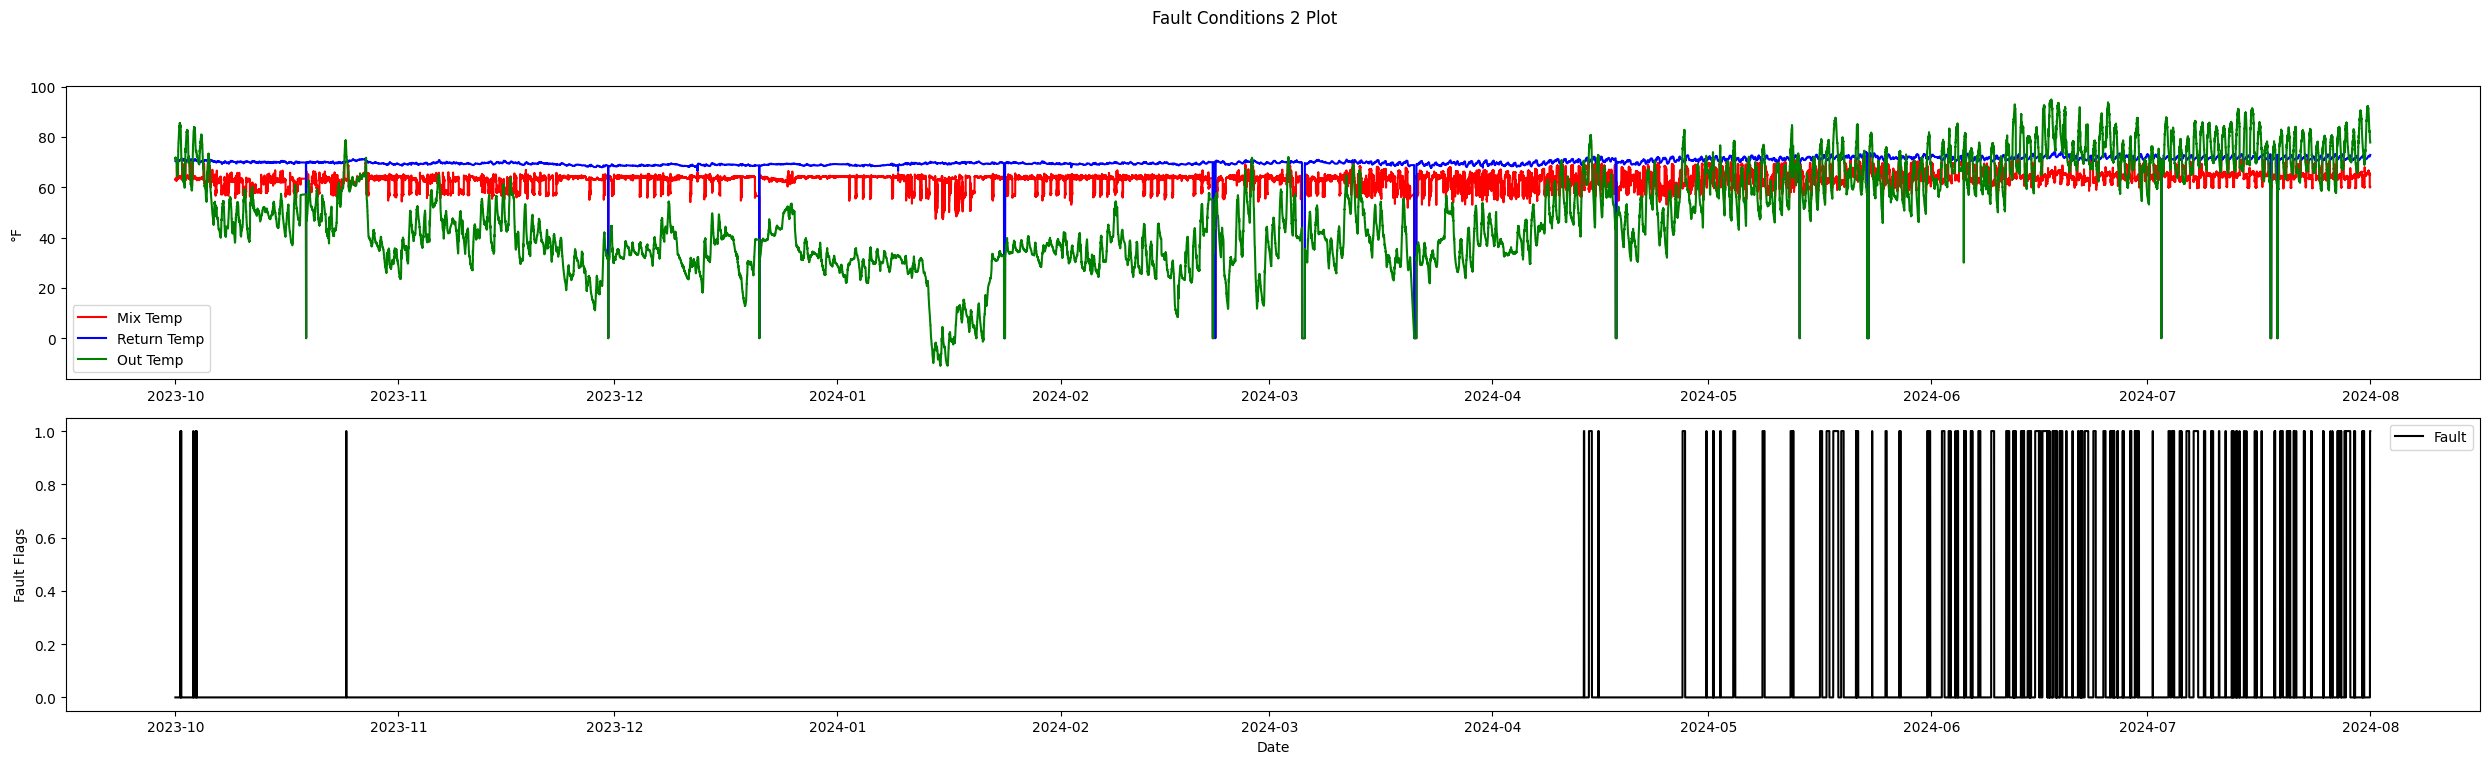

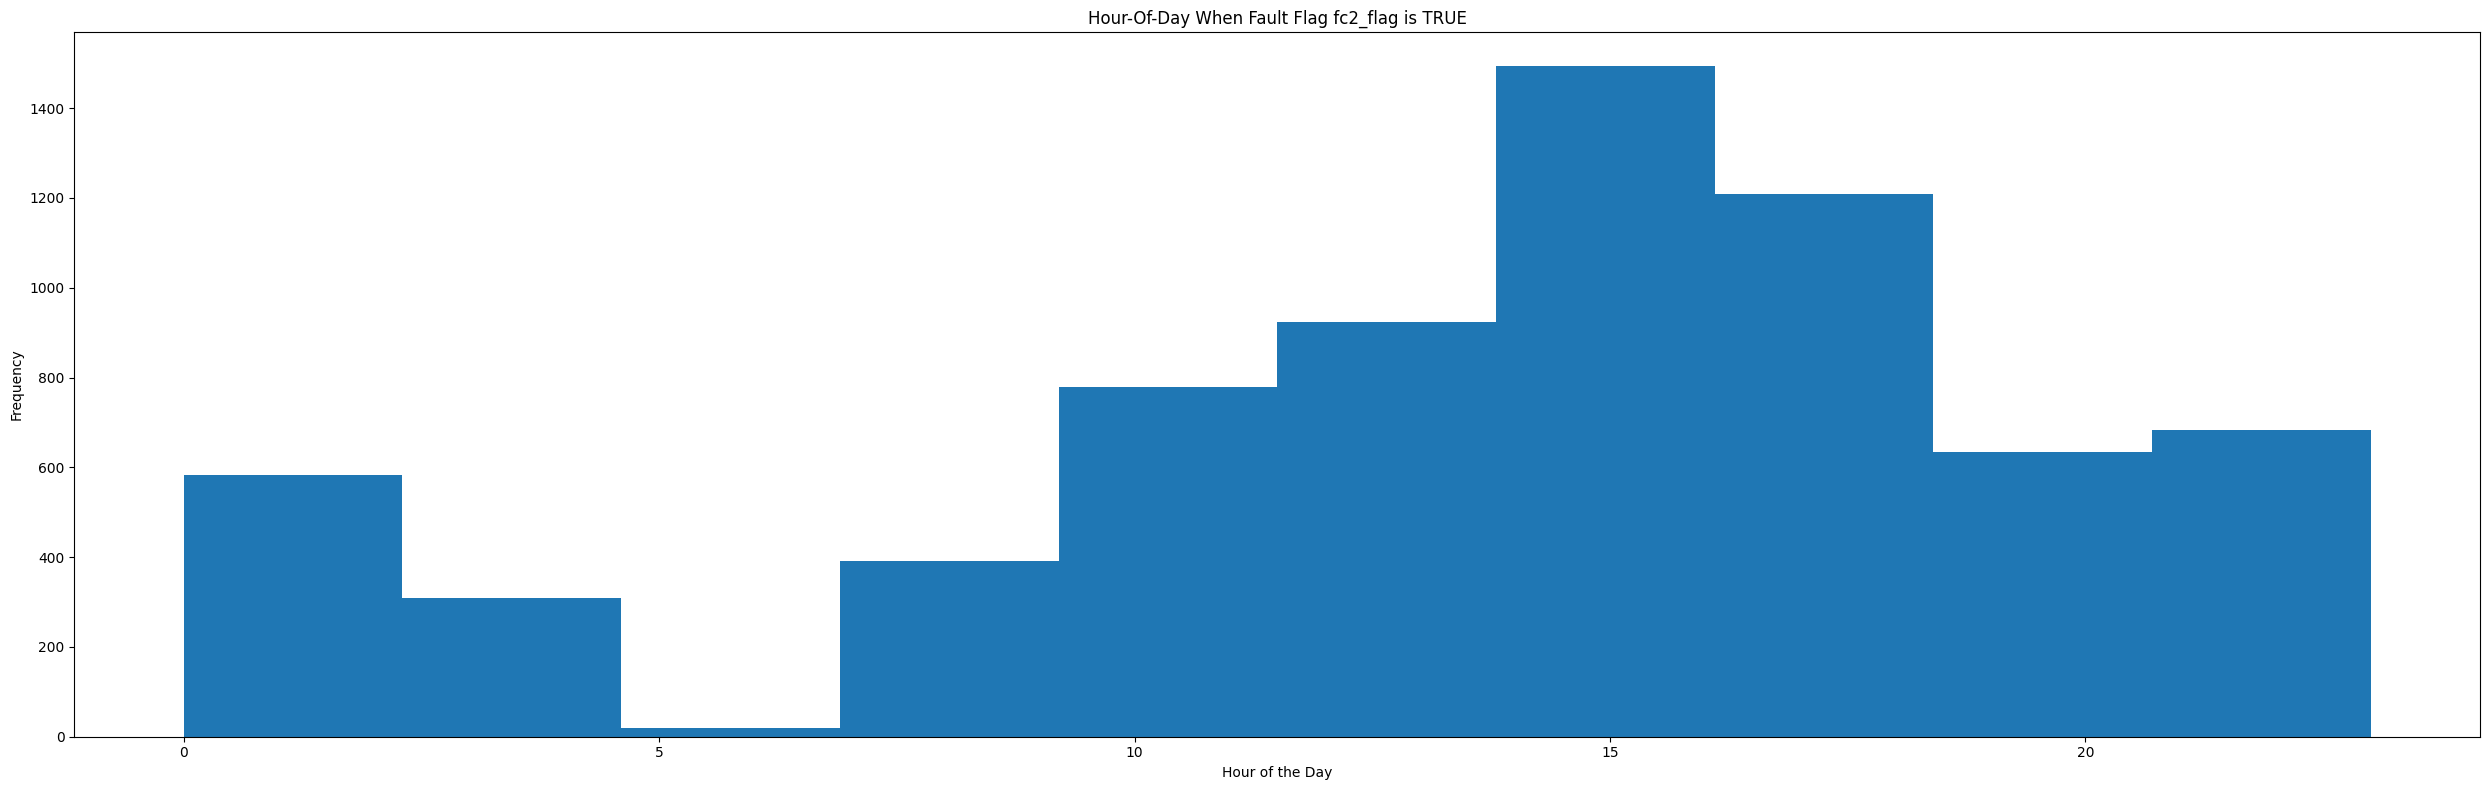

In [19]:
from open_fdd.air_handling_unit.faults import FaultConditionTwo
from open_fdd.air_handling_unit.reports import FaultCodeTwoReport

# Create an instance of FaultConditionTwo
fc2 = FaultConditionTwo(config_dict)

# Retrieve and print the required columns for this fault condition
fc2_required_columns = fc2.get_required_columns()
print(fc2_required_columns)

# Apply the fault condition to the DataFrame
df_fc2 = fc2.apply(df)

# Calculate and store the fault sum in fault_counts
fault_counts["fc2_fault_sum"] = df_fc2["fc2_flag"].sum()

# Print the fault sum
print(f"FC2 Fault Sum: {fault_counts['fc2_fault_sum']}")

# Retrieve and print all the metrics (keys and values) from summarize_fault_times
fc2_report = FaultCodeTwoReport(config_dict)
summary_metrics = fc2_report.summarize_fault_times(df_fc2)

# Print each key and value
for key, value in summary_metrics.items():
    print(f"{key}: {value}")

# Generate and display the report if there is a fault
if fault_counts['fc2_fault_sum'] != 0:
    fc2_report.display_report_in_ipython(df_fc2)
else:
    print("No faults found.")


In [20]:
from open_fdd.air_handling_unit.faults import FaultConditionThree
from open_fdd.air_handling_unit.reports import FaultCodeThreeReport

# Create an instance of FaultConditionThree
fc3 = FaultConditionThree(config_dict)

# Retrieve and print the required columns for this fault condition
fc3_required_columns = fc3.get_required_columns()
print(fc3_required_columns)

# Apply the fault condition to the DataFrame
df_fc3 = fc3.apply(df)

# Calculate and store the fault sum in fault_counts
fault_counts["fc3_fault_sum"] = df_fc3["fc3_flag"].sum()

# Print the fault sum
print(f"FC3 Fault Sum: {fault_counts['fc3_fault_sum']}")

# Retrieve and print all the metrics (keys and values) from summarize_fault_times
fc3_report = FaultCodeThreeReport(config_dict)
summary_metrics = fc3_report.summarize_fault_times(df_fc3)

# Print each key and value
for key, value in summary_metrics.items():
    print(f"{key}: {value}")

# Generate and display the report if there is a fault
if fault_counts['fc3_fault_sum'] != 0:
    fc3_report.display_report_in_ipython(df_fc3)
else:
    print("No faults found.")


fc3_flag = 1 if (MAT - εMAT > max(RAT + εRAT, OAT + εOAT)) and (VFDSPD > 0) for N consecutive values else 0 
Fault Condition 3: Mix temperature too high; should be between outside and return air 
Required inputs are the mix air temperature, return air temperature, outside air temperature, and supply fan VFD speed 
Your config dictionary is mapped as: MA_Temp, RA_Temp, OaTemp, SA_FanSpeed
FC3 Fault Sum: 0
total_days: 305.0
total_hours: 7320
hours_fc3_mode: 0
percent_true: 0.0
percent_false: 100.0
flag_true_mat: nan
flag_true_oat: nan
flag_true_rat: nan
hours_motor_runtime: 7283.38
No faults found.


## Fault conditon 4
This fault condition involves resampling the data to obtain hourly sums of the calculated AHU operating states. It's important to keep this resampled dataframe separate, as merging it back into the original dataframe would be problematic due to the differences introduced by the resampling process.

fc4_flag = 1 if excessive mode changes (> δOS_max) occur within an hour across heating, econ, econ+mech, mech clg, and min OA modes 
Fault Condition 4: Excessive AHU operating state changes detected (hunting behavior) 
Required inputs are the economizer signal, supply fan VFD speed, and optionally heating and cooling signals 
Your config dictionary is mapped as: OA_RA_Damper, SA_FanSpeed, cooling_signal
to compute AHU OS state changes per hour
to flag any hunting issue
and this usually takes a while to run...
FC4 Fault Sum: 159
total_days: 304.96
total_hours: 7319
hours_fc4_mode: 159
percent_true: 2.17
percent_false: 97.83
percent_of_time_AHU_in_mech_clg_mode: 0.01
percent_of_time_AHU_in_econ_plus_mech_clg_mode: 11.84
percent_of_time_AHU_in_econ_free_clg_mode: 82.6
percent_of_time_AHU_in_heating_mode: 0.0
total_hours_heating_mode: 0.0
total_hours_econ_mode: 6046.0
total_hours_econ_mech_clg_mode: 867.0
total_hours_mech_clg_mode: 1.0
total days: 304.96
total hours: 7319
hours fc4 mode: 1

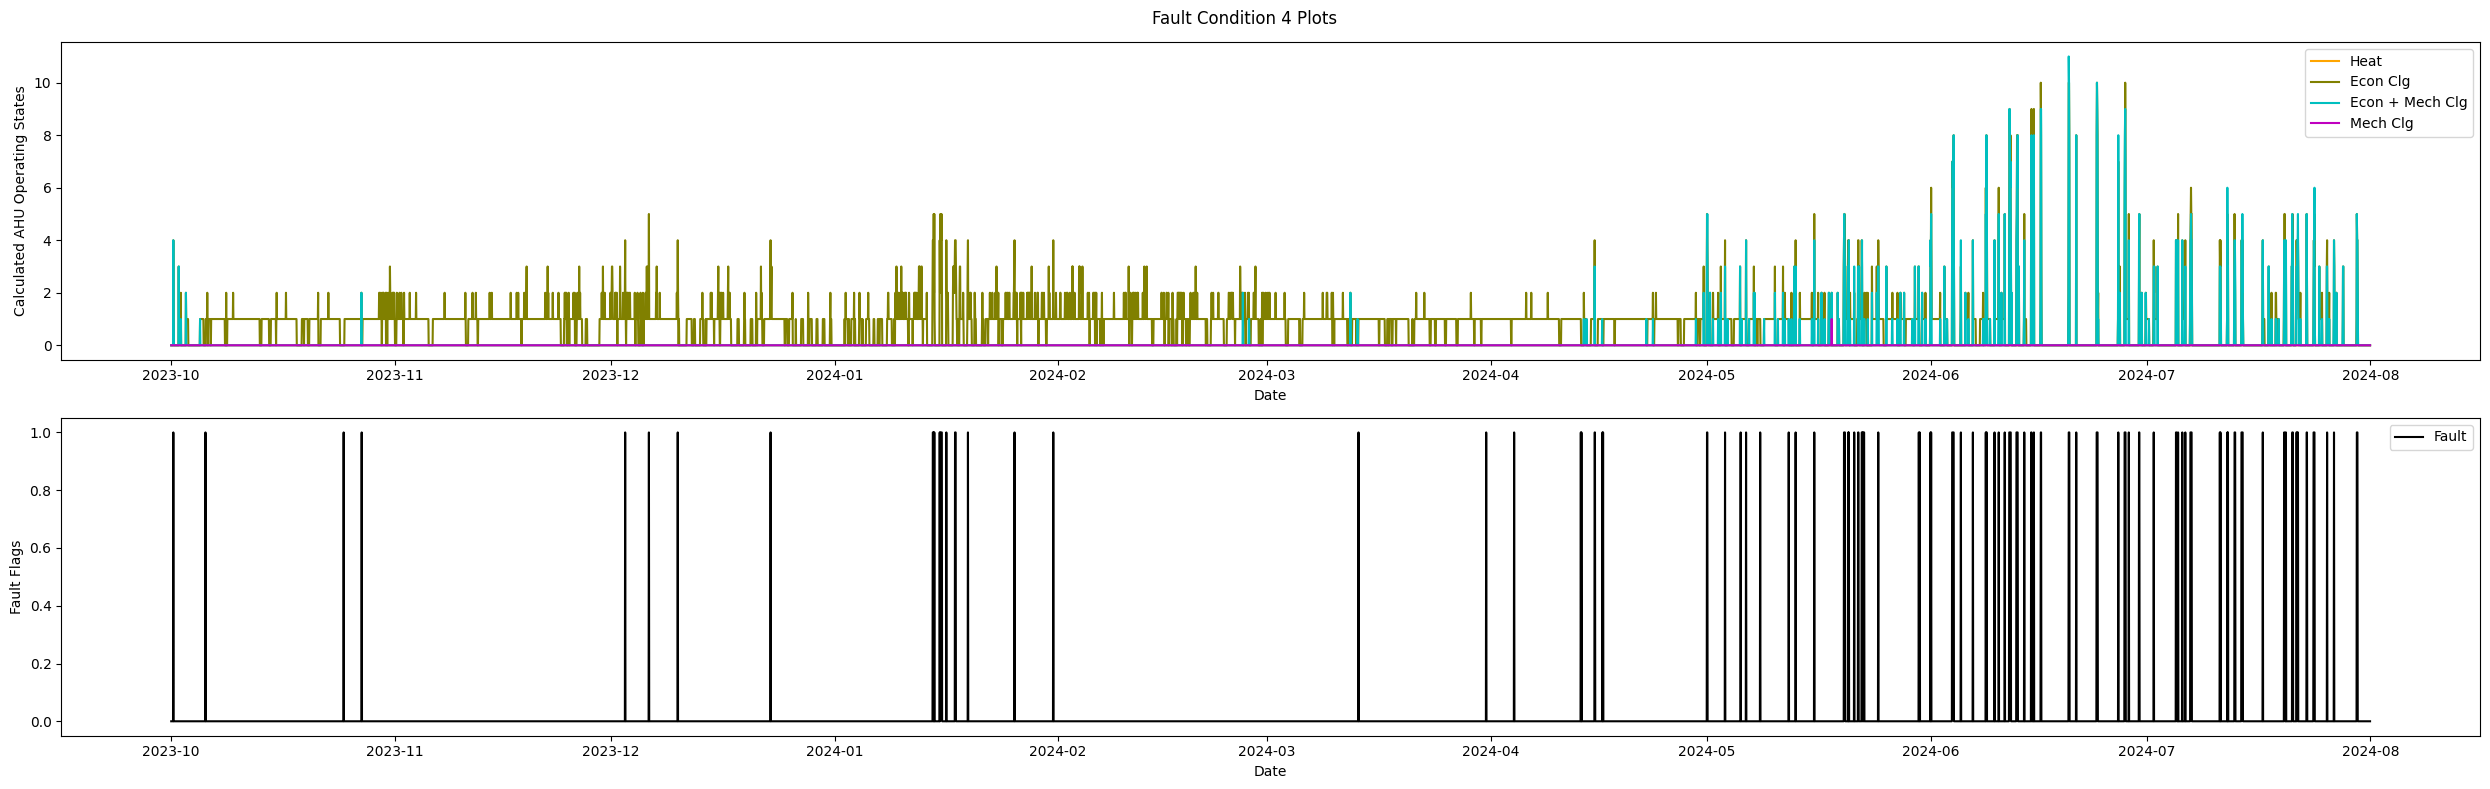

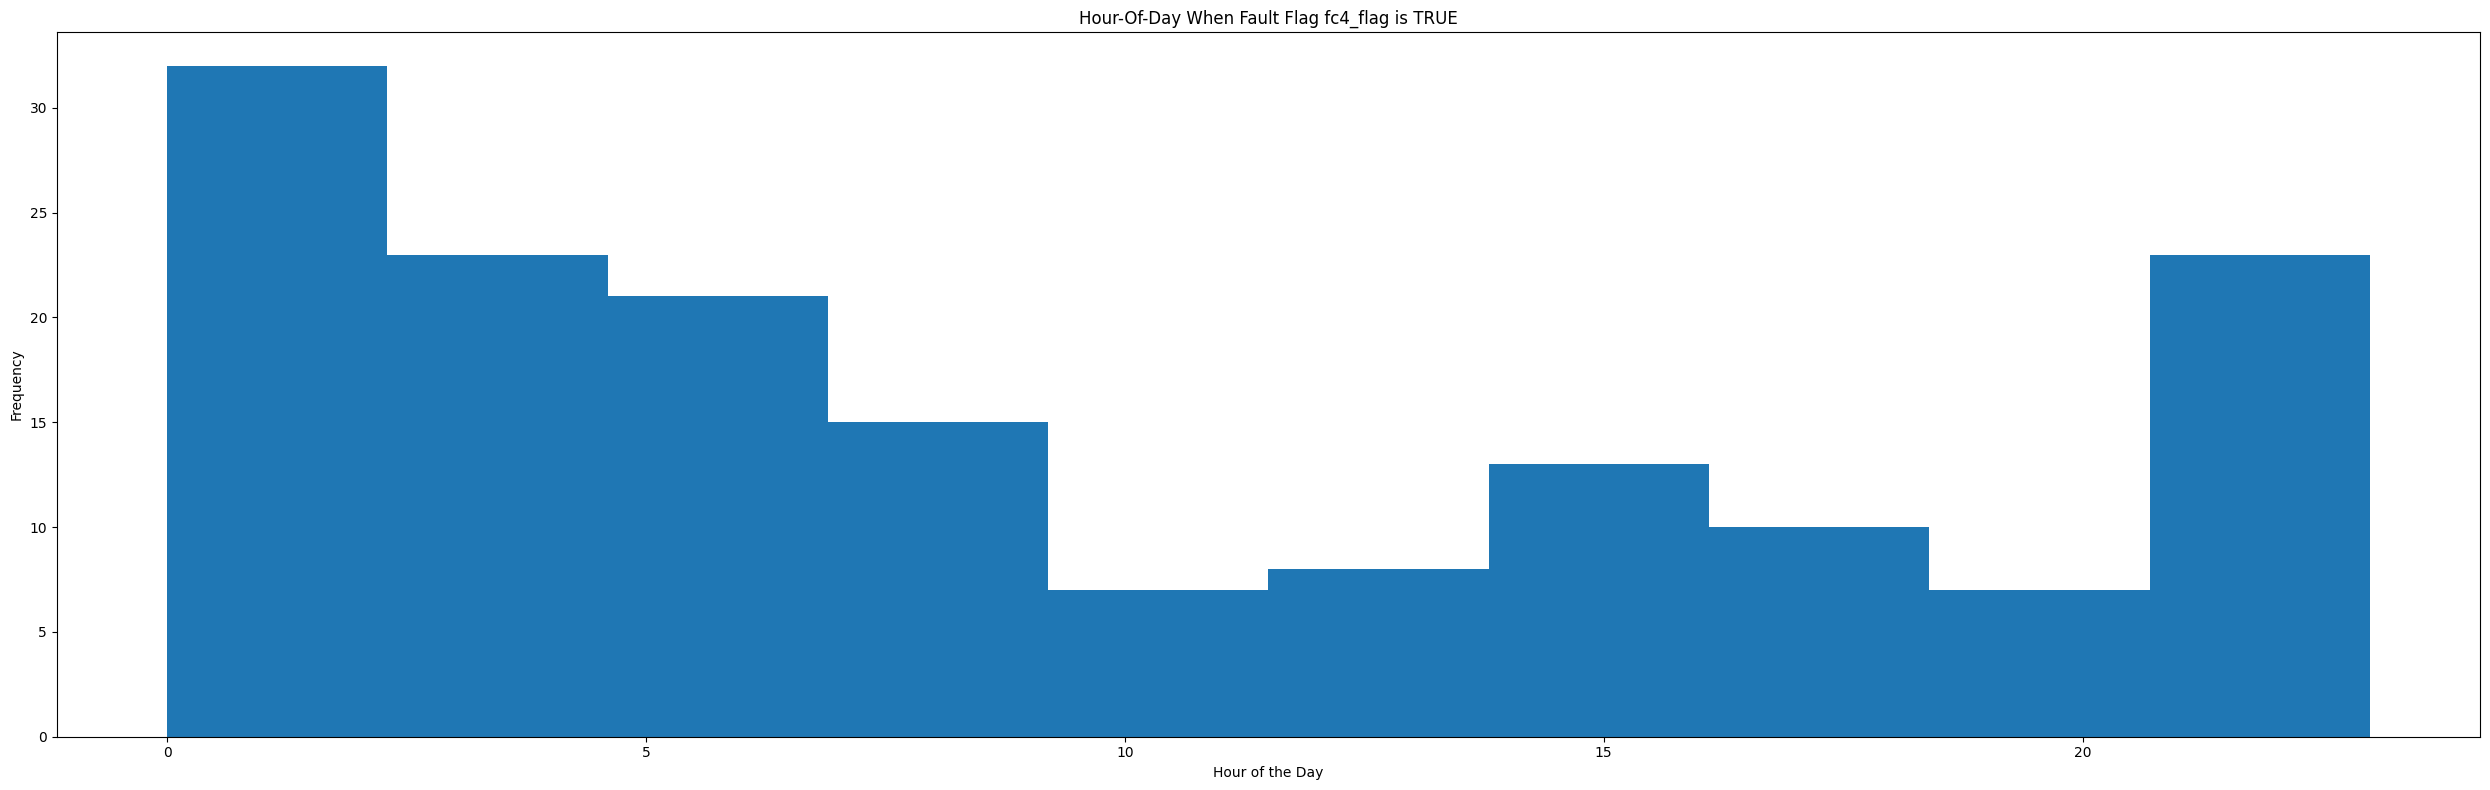

In [21]:
from open_fdd.air_handling_unit.faults import FaultConditionFour
from open_fdd.air_handling_unit.reports import FaultCodeFourReport

# Create an instance of FaultConditionFour
fc4 = FaultConditionFour(config_dict)

# Retrieve and print the required columns for this fault condition
fc4_required_columns = fc4.get_required_columns()
print(fc4_required_columns)

# Apply the fault condition to the DataFrame
df_fc4 = fc4.apply(df_copy_for_fc4)

# Calculate and store the fault sum in fault_counts
fault_counts["fc4_fault_sum"] = df_fc4["fc4_flag"].sum()

# Print the fault sum
print(f"FC4 Fault Sum: {fault_counts['fc4_fault_sum']}")

# Retrieve and print all the metrics (keys and values) from summarize_fault_times
fc4_report = FaultCodeFourReport(config_dict)
summary_metrics = fc4_report.summarize_fault_times(df_fc4)

# Print each key and value
for key, value in summary_metrics.items():
    print(f"{key}: {value}")

# Generate and display the report if there is a fault
if fault_counts['fc4_fault_sum'] != 0:
    fc4_report.display_report_in_ipython(df_fc4)
else:
    print("No faults found.")


In [22]:
df_fc4.columns

Index([                   'HWS_Blr1',                    'HWS_Blr2',
                        'Pump_Speed',                'Bypass_Valve',
             'Bypass_Valve_Feedback',                    'HWS_Temp',
                           'Oa_Temp',                   'Eff_DP_SP',
                          'HWR_Temp',                  'Flow_Meter',
                        'HWS_Eff_SP',                      'Blr_SP',
                       'HWS_High_SP',                  'HWS_Low_SP',
                            'Wet_DP',               'Eff_Bypass_SP',
                  'Blr1_Firing_Rate',            'Blr2_Firing_Rate',
                         'SA_FanVFD',                   'EA_FanVFD',
                        'WheelSpeed',                      'DaTemp',
                               'DX1',                         'DX2',
                        'EA_DuctSPt',                     'SA_Flow',
                         'EFF_SaCFM',                  'DuctStatic',
                       'PreCoolTem

## MissingColumnError

This code will trigger a `MissingColumnError`, which is correctly handled by open-fdd under the hood. The error occurs because this AHU does not have a heating coil, which is a required input for this fault condition.

In this case, the `heating signal` is missing (`None`), leading to the error, which is expected since the AHU lacks a heating coil.

In [23]:
from open_fdd.air_handling_unit.faults import FaultConditionFive
from open_fdd.air_handling_unit.reports import FaultCodeFiveReport

# Create an instance of FaultConditionFive
fc5 = FaultConditionFive(config_dict)

# Retrieve and print the required columns for this fault condition
fc5_required_columns = fc5.get_required_columns()
print(fc5_required_columns)

# Apply the fault condition to the DataFrame
df_fc5 = fc5.apply(df)

# Calculate and store the fault sum in fault_counts
fault_counts["fc5_fault_sum"] = df_fc5["fc5_flag"].sum()

# Print the fault sum
print(f"FC5 Fault Sum: {fault_counts['fc5_fault_sum']}")

# Retrieve and print all the metrics (keys and values) from summarize_fault_times
fc5_report = FaultCodeFiveReport(config_dict)
summary_metrics = fc5_report.summarize_fault_times(df_fc5)

# Print each key and value
for key, value in summary_metrics.items():
    print(f"{key}: {value}")

# Generate and display the report if there is a fault
if fault_counts['fc5_fault_sum'] != 0:
    fc5_report.display_report_in_ipython(df_fc5)
else:
    print("No faults found.")


MissingColumnError: One or more required columns are missing or None 
fc5_flag = 1 if (SAT + εSAT <= MAT - εMAT + ΔT_supply_fan) and (heating signal > 0) and (VFDSPD > 0) for N consecutive values else 0 
Fault Condition 5: SAT too low; should be higher than MAT in HTG MODE, potential broken heating valve or mechanical issue 
Required inputs are the mixed air temperature, supply air temperature, heating signal, and supply fan VFD speed 
['MA_Temp', 'HC1_DaTemp', None, 'SA_FanSpeed']

## InvalidParameterError

In the `config_dict`, an `InvalidParameterError` is triggered if a threshold parameter is accidentally set to the wrong data type. This error handling ensures that all thresholds are correctly typed. In this example, the `config_dict` is intentionally configured to demonstrate this error:

```python
'OAT_RAT_DELTA_MIN': 10, # Intentional as type int to show new error handling in fc6
```

This AHU includes a supply fan flow station, enabling us to run fault condition 6. However, be aware that this fault condition might produce many false positives. Fault condition 6 calculates the outside air fraction (% OA) as part of its equation, and the presence of an ERV could interfere with this calculation due to its impact on mixed air temperatures.

Given the complexity of fault condition 6, a dedicated tutorial notebook should be developed to explain it in detail. In the meantime, consider experimenting with the Python code to gain a deeper understanding of this fault condition and its equation.

https://gist.github.com/bbartling/e0fb8427b1e0d148a06e3f09121ed5dc

In [24]:
from open_fdd.air_handling_unit.faults import FaultConditionSix
from open_fdd.air_handling_unit.reports import FaultCodeSixReport

# Create an instance of FaultConditionSix
fc6 = FaultConditionSix(config_dict)

# Retrieve and print the required columns for this fault condition
fc6_required_columns = fc6.get_required_columns()
print(fc6_required_columns)

# Apply the fault condition to the DataFrame
df_fc6 = fc6.apply(df)

# Calculate and store the fault sum in fault_counts
fault_counts["fc6_fault_sum"] = df_fc6["fc6_flag"].sum()

# Print the fault sum
print(f"FC6 Fault Sum: {fault_counts['fc6_fault_sum']}")

# Retrieve and print all the metrics (keys and values) from summarize_fault_times
fc6_report = FaultCodeSixReport(config_dict)
summary_metrics = fc6_report.summarize_fault_times(df_fc6)

# Print each key and value
for key, value in summary_metrics.items():
    print(f"{key}: {value}")

# Generate and display the report if there is a fault
if fault_counts['fc6_fault_sum'] != 0:
    fc6_report.display_report_in_ipython(df_fc6)
else:
    print("No faults found.")


InvalidParameterError: The parameter 'oat_rat_delta_min' should be a float, but got int.

No heating coil so we get an `MissingColumnError` as shown below for fc7 which is shown here for demonstration purposes.                     

In [25]:
from open_fdd.air_handling_unit.faults import FaultConditionSeven
from open_fdd.air_handling_unit.reports import FaultCodeSevenReport

# Create an instance of FaultConditionSeven
fc7 = FaultConditionSeven(config_dict)

# Retrieve and print the required columns for this fault condition
fc7_required_columns = fc7.get_required_columns()
print(fc7_required_columns)

# Apply the fault condition to the DataFrame
df_fc7 = fc7.apply(df)

# Calculate and store the fault sum in fault_counts
fault_counts["fc7_fault_sum"] = df_fc7["fc7_flag"].sum()

# Print the fault sum
print(f"FC7 Fault Sum: {fault_counts['fc7_fault_sum']}")

# Retrieve and print all the metrics (keys and values) from summarize_fault_times
fc7_report = FaultCodeSevenReport(config_dict)
summary_metrics = fc7_report.summarize_fault_times(df_fc7)

# Print each key and value
for key, value in summary_metrics.items():
    print(f"{key}: {value}")

# Generate and display the report if there is a fault
if fault_counts['fc7_fault_sum'] != 0:
    fc7_report.display_report_in_ipython(df_fc7)
else:
    print("No faults found.")


MissingColumnError: One or more required columns are missing or None 
fc7_flag = 1 if SAT < (SATSP - εSAT) in full heating mode and VFD speed > 0 for N consecutive values else 0 
Fault Condition 7: Supply air temperature too low in full heating mode with heating valve fully open 
Required inputs are the supply air temperature, supply air temperature setpoint, heating signal, and supply fan VFD speed 
['HC1_DaTemp', 'Eff_DaTempSP', None, 'SA_FanSpeed']

fc8_flag = 1 if |SAT - MAT - ΔT_fan| > √(εSAT² + εMAT²) in economizer mode for N consecutive values else 0 
Fault Condition 8: Supply air temperature and mixed air temperature should be approximately equal in economizer mode 
Required inputs are the mixed air temperature, supply air temperature, economizer signal, and cooling signal 
Your config dictionary is mapped as: MA_Temp, HC1_DaTemp, OA_RA_Damper, cooling_signal
FC8 Fault Sum: 157
total_days: 305.0
total_hours: 7320
hours_fc8_mode: 7
percent_true: 0.15
percent_false: 99.85
flag_true_mat: 68.72
flag_true_sat: 61.97
hours_motor_runtime: 7283.38
total days: 305.0
total hours: 7320
hours fc8 mode: 7
percent true: 0.15
percent false: 99.85
flag true mat: 68.72
flag true sat: 61.97
hours motor runtime: 7283.38


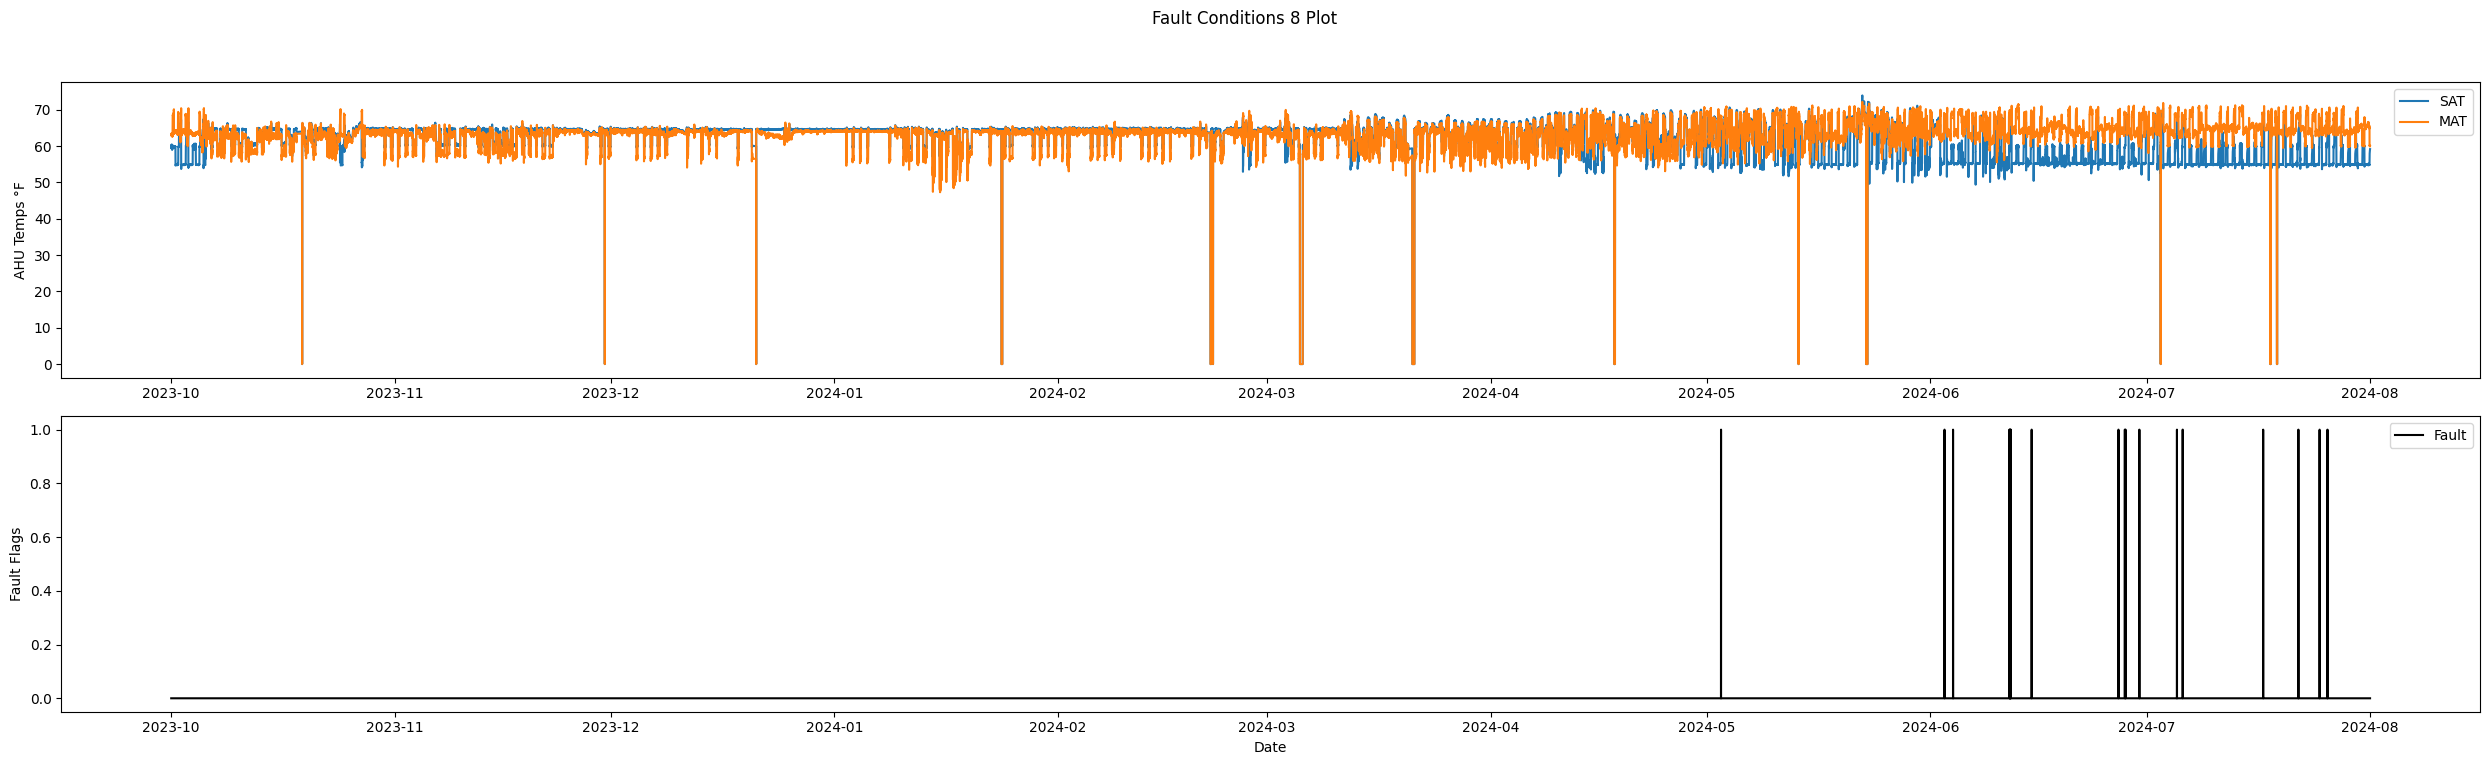

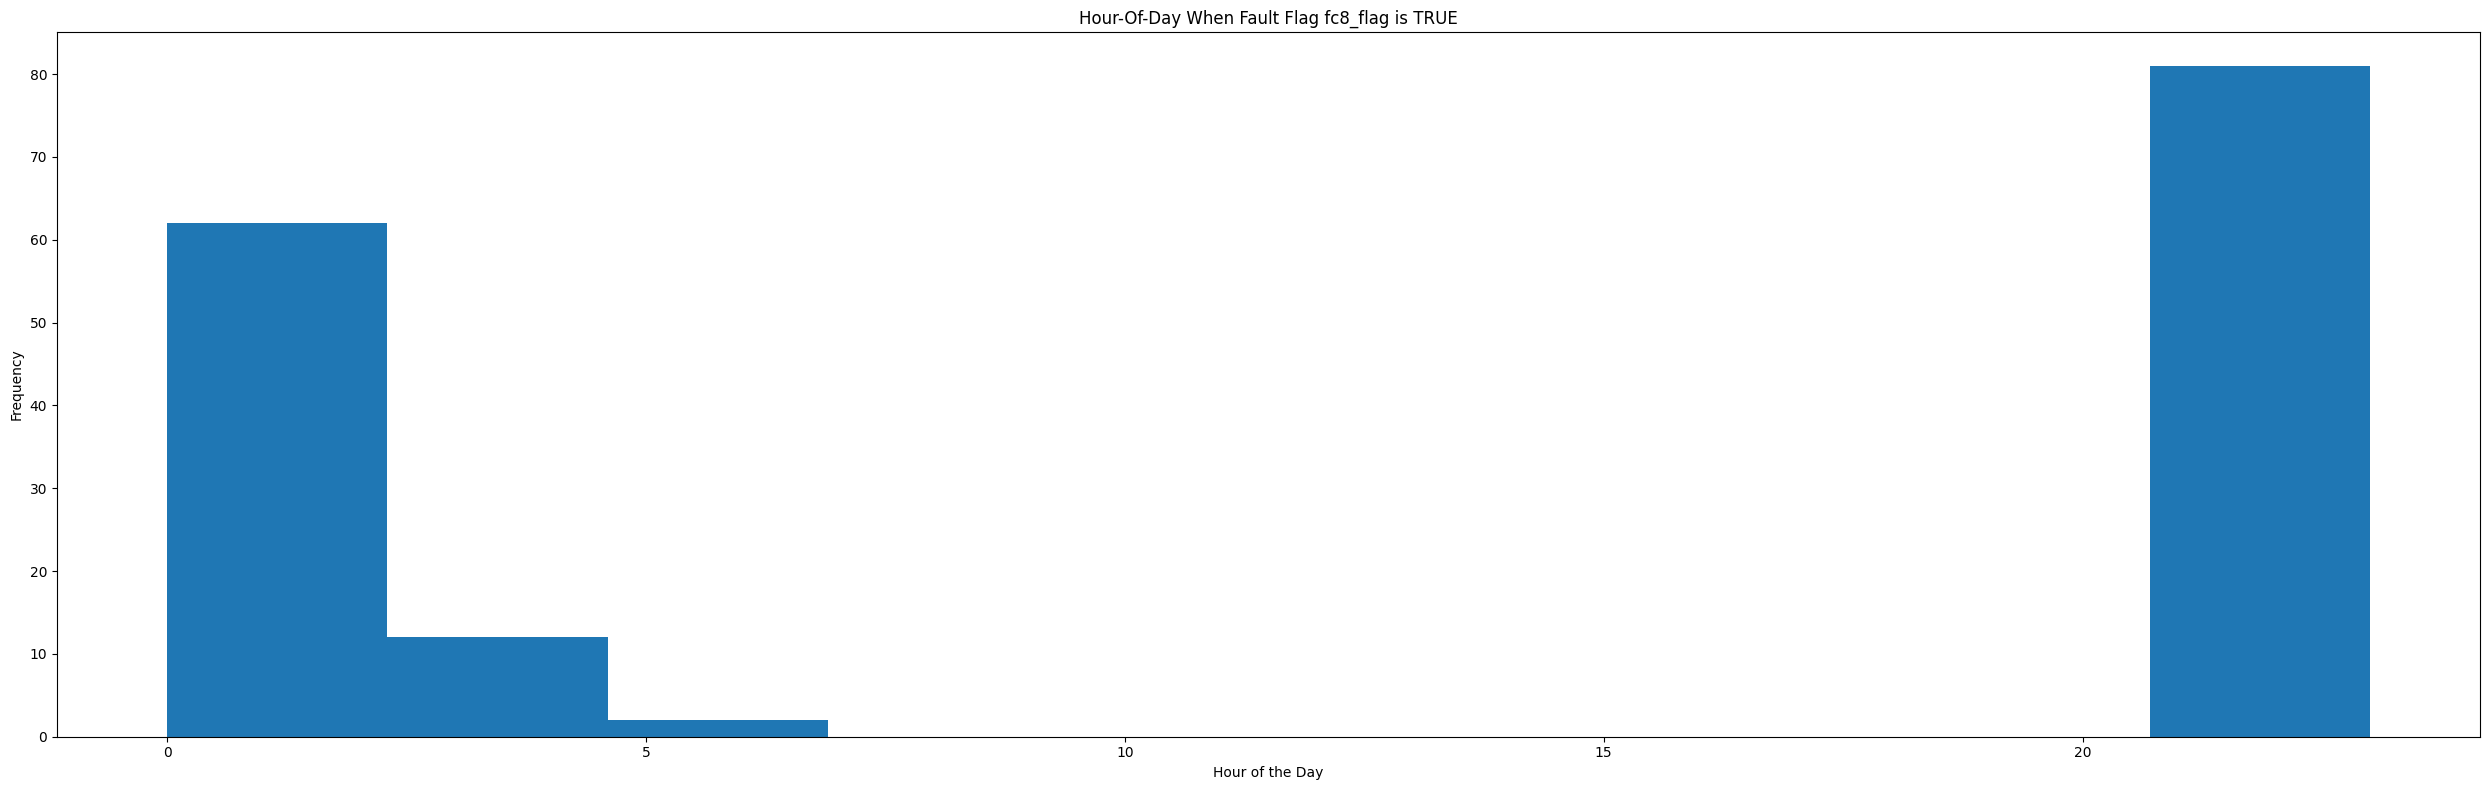

In [26]:
from open_fdd.air_handling_unit.faults import FaultConditionEight
from open_fdd.air_handling_unit.reports import FaultCodeEightReport

# Create an instance of FaultConditionEight
fc8 = FaultConditionEight(config_dict)

# Retrieve and print the required columns for this fault condition
fc8_required_columns = fc8.get_required_columns()
print(fc8_required_columns)

# Apply the fault condition to the DataFrame
df_fc8 = fc8.apply(df)

# Calculate and store the fault sum in fault_counts
fault_counts["fc8_fault_sum"] = df_fc8["fc8_flag"].sum()

# Print the fault sum
print(f"FC8 Fault Sum: {fault_counts['fc8_fault_sum']}")

# Retrieve and print all the metrics (keys and values) from summarize_fault_times
fc8_report = FaultCodeEightReport(config_dict)
summary_metrics = fc8_report.summarize_fault_times(df_fc8)

# Print each key and value
for key, value in summary_metrics.items():
    print(f"{key}: {value}")

# Generate and display the report if there is a fault
if fault_counts['fc8_fault_sum'] != 0:
    fc8_report.display_report_in_ipython(df_fc8)
else:
    print("No faults found.")


fc9_flag = 1 if OAT > (SATSP - ΔT_fan + εSAT) in free cooling mode for N consecutive values else 0 
Fault Condition 9: Outside air temperature too high in free cooling mode without additional mechanical cooling in economizer mode 
Required inputs are the supply air temperature setpoint, outside air temperature, cooling signal, and economizer signal 
Your config dictionary is mapped as: Eff_DaTempSP, OaTemp, cooling_signal, OA_RA_Damper
FC9 Fault Sum: 1887
total_days: 305.0
total_hours: 7320
hours_fc9_mode: 132
percent_true: 1.79
percent_false: 98.21
flag_true_oat: 64.1
flag_true_satsp: 55.62
hours_motor_runtime: 7283.38
total days: 305.0
total hours: 7320
hours fc9 mode: 132
percent true: 1.79
percent false: 98.21
flag true oat: 64.1
flag true satsp: 55.62
hours motor runtime: 7283.38


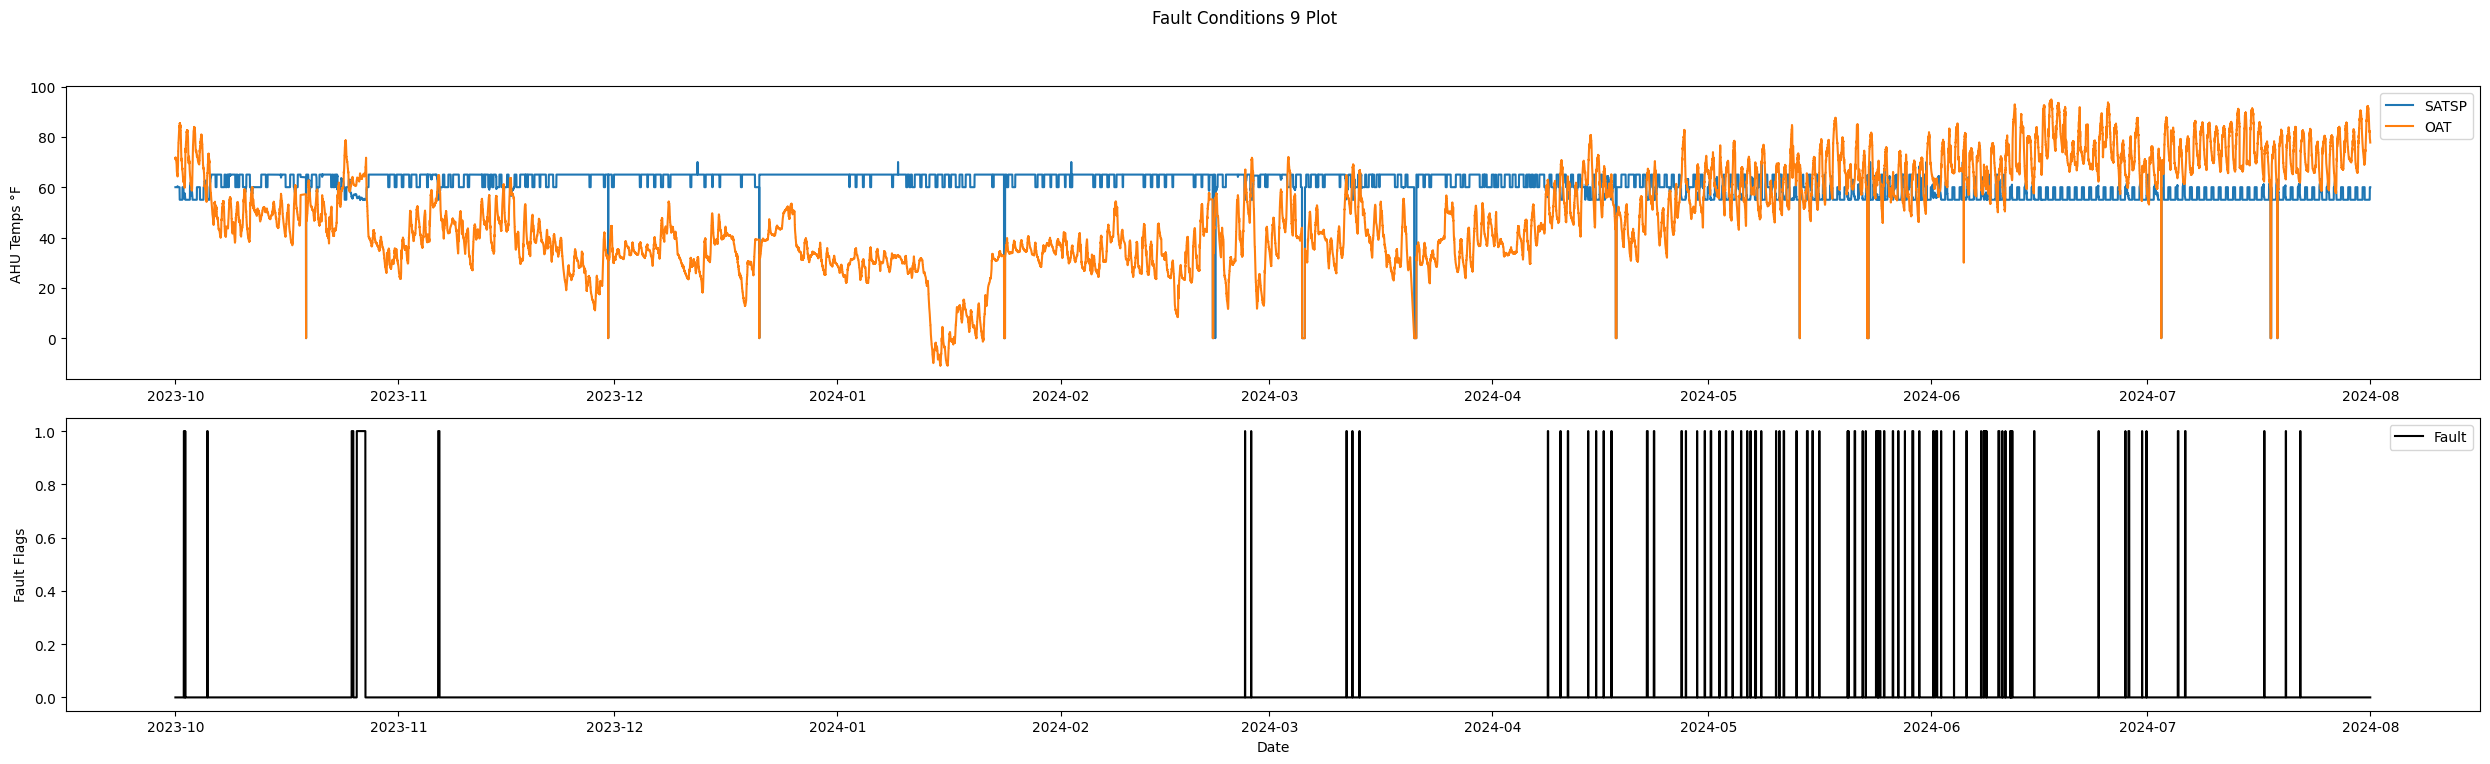

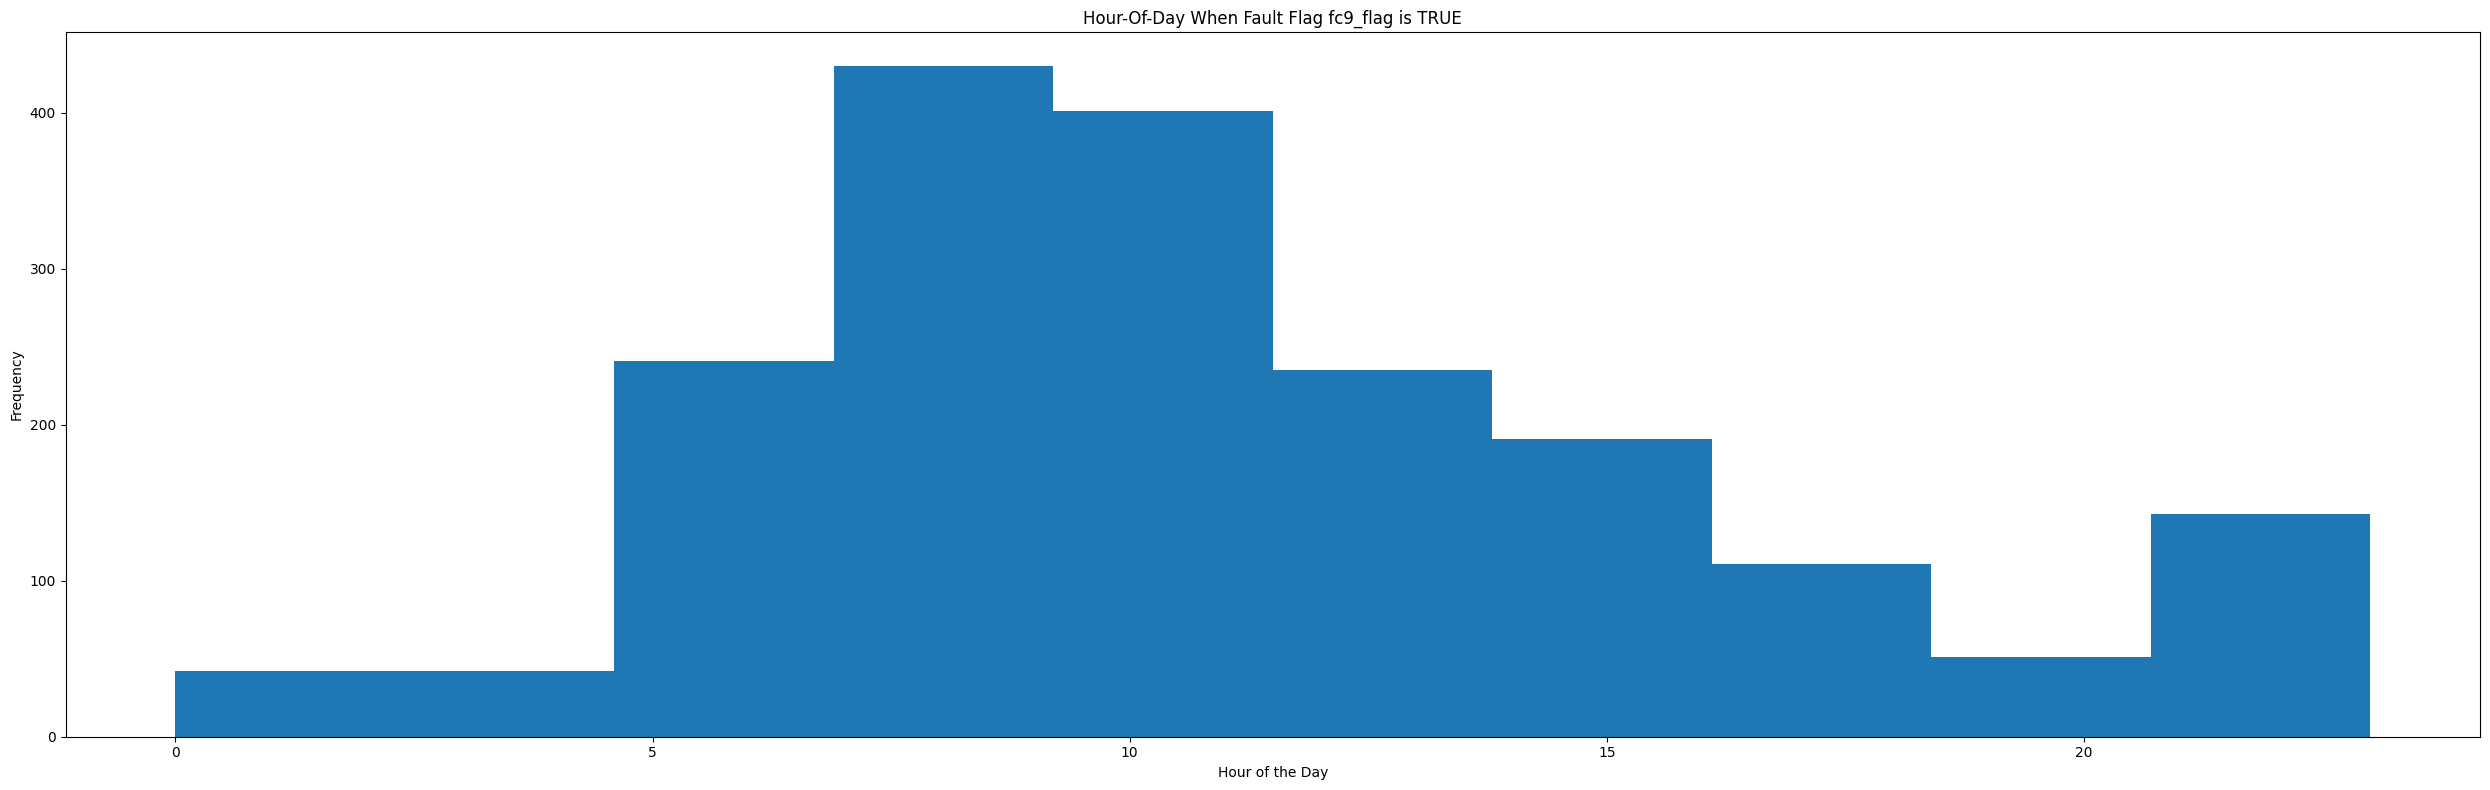

In [27]:
from open_fdd.air_handling_unit.faults import FaultConditionNine
from open_fdd.air_handling_unit.reports import FaultCodeNineReport

# Create an instance of FaultConditionNine
fc9 = FaultConditionNine(config_dict)

# Retrieve and print the required columns for this fault condition
fc9_required_columns = fc9.get_required_columns()
print(fc9_required_columns)

# Apply the fault condition to the DataFrame
df_fc9 = fc9.apply(df)

# Calculate and store the fault sum in fault_counts
fault_counts["fc9_fault_sum"] = df_fc9["fc9_flag"].sum()

# Print the fault sum
print(f"FC9 Fault Sum: {fault_counts['fc9_fault_sum']}")

# Retrieve and print all the metrics (keys and values) from summarize_fault_times
fc9_report = FaultCodeNineReport(config_dict)
summary_metrics = fc9_report.summarize_fault_times(df_fc9)

# Print each key and value
for key, value in summary_metrics.items():
    print(f"{key}: {value}")

# Generate and display the report if there is a fault
if fault_counts['fc9_fault_sum'] != 0:
    fc9_report.display_report_in_ipython(df_fc9)
else:
    print("No faults found.")

In [28]:
from open_fdd.air_handling_unit.faults import FaultConditionTen
from open_fdd.air_handling_unit.reports import FaultCodeTenReport

# Create an instance of FaultConditionTen
fc10 = FaultConditionTen(config_dict)

# Retrieve and print the required columns for this fault condition
fc10_required_columns = fc10.get_required_columns()
print(fc10_required_columns)

# Apply the fault condition to the DataFrame
df_fc10 = fc10.apply(df)

# Calculate and store the fault sum in fault_counts
fault_counts["fc10_fault_sum"] = df_fc10["fc10_flag"].sum()

# Print the fault sum
print(f"FC10 Fault Sum: {fault_counts['fc10_fault_sum']}")

# Retrieve and print all the metrics (keys and values) from summarize_fault_times
fc10_report = FaultCodeTenReport(config_dict)
summary_metrics = fc10_report.summarize_fault_times(df_fc10)

# Print each key and value
for key, value in summary_metrics.items():
    print(f"{key}: {value}")

# Generate and display the report if there is a fault
if fault_counts['fc10_fault_sum'] != 0:
    fc10_report.display_report_in_ipython(df_fc10)
else:
    print("No faults found.")

fc10_flag = 1 if |OAT - MAT| > √(εOAT² + εMAT²) in economizer + mech cooling mode for N consecutive values else 0 
Fault Condition 10: Outdoor air temperature and mixed air temperature should be approximately equal in economizer plus mechanical cooling mode 
Required inputs are the outside air temperature, mixed air temperature, cooling signal, and economizer signal 
Your config dictionary is mapped as: OaTemp, MA_Temp, cooling_signal, OA_RA_Damper
FC10 Fault Sum: 0
total_days: 305.0
total_hours: 7320
hours_fc10_mode: 0
percent_true: 0.0
percent_false: 100.0
flag_true_oat: nan
flag_true_mat: nan
hours_motor_runtime: 7283.38
No faults found.


In [29]:
from open_fdd.air_handling_unit.faults import FaultConditionEleven
from open_fdd.air_handling_unit.reports import FaultCodeElevenReport

# Create an instance of FaultConditionEleven
fc11 = FaultConditionEleven(config_dict)

# Retrieve and print the required columns for this fault condition
fc11_required_columns = fc11.get_required_columns()
print(fc11_required_columns)

# Apply the fault condition to the DataFrame
df_fc11 = fc11.apply(df)

# Calculate and store the fault sum in fault_counts
fault_counts["fc11_fault_sum"] = df_fc11["fc11_flag"].sum()

# Print the fault sum
print(f"FC11 Fault Sum: {fault_counts['fc11_fault_sum']}")

# Retrieve and print all the metrics (keys and values) from summarize_fault_times
fc11_report = FaultCodeElevenReport(config_dict)
summary_metrics = fc11_report.summarize_fault_times(df_fc11)

# Print each key and value
for key, value in summary_metrics.items():
    print(f"{key}: {value}")

# Generate and display the report if there is a fault
if fault_counts['fc11_fault_sum'] != 0:
    fc11_report.display_report_in_ipython(df_fc11)
else:
    print("No faults found.")

fc11_flag = 1 if OAT < (SATSP - ΔT_fan - εSAT) in economizer cooling mode for N consecutive values else 0 
Fault Condition 11: Outside air temperature too low for 100% outdoor air cooling in economizer cooling mode (Economizer performance fault) 
Required inputs are the supply air temperature setpoint, outside air temperature, cooling signal, and economizer signal 
Your config dictionary is mapped as: Eff_DaTempSP, OaTemp, cooling_signal, OA_RA_Damper
FC11 Fault Sum: 0
total_days: 305.0
total_hours: 7320
hours_fc11_mode: 0
percent_true: 0.0
percent_false: 100.0
flag_true_oat: nan
flag_true_sat_sp: nan
hours_motor_runtime: 7283.38
No faults found.


In [30]:
from open_fdd.air_handling_unit.faults import FaultConditionTwelve
from open_fdd.air_handling_unit.reports import FaultCodeTwelveReport

# Create an instance of FaultConditionTwelve
fc12 = FaultConditionTwelve(config_dict)

# Retrieve and print the required columns for this fault condition
fc12_required_columns = fc12.get_required_columns()
print(fc12_required_columns)

# Apply the fault condition to the DataFrame
df_fc12 = fc12.apply(df)

# Calculate and store the fault sum in fault_counts
fault_counts["fc12_fault_sum"] = df_fc12["fc12_flag"].sum()

# Print the fault sum
print(f"FC12 Fault Sum: {fault_counts['fc12_fault_sum']}")

# Retrieve and print all the metrics (keys and values) from summarize_fault_times
fc12_report = FaultCodeTwelveReport(config_dict)
summary_metrics = fc12_report.summarize_fault_times(df_fc12)

# Print each key and value
for key, value in summary_metrics.items():
    print(f"{key}: {value}")

# Generate and display the report if there is a fault
if fault_counts['fc12_fault_sum'] != 0:
    fc12_report.display_report_in_ipython(df_fc12)
else:
    print("No faults found.")

fc12_flag = 1 if SAT >= MAT + εMAT in economizer + mech cooling mode for N consecutive values else 0 
Fault Condition 12: Supply air temperature too high; should be less than mixed air temperature in economizer plus mechanical cooling mode 
Required inputs are the supply air temperature, mixed air temperature, cooling signal, and economizer signal 
Your config dictionary is mapped as: HC1_DaTemp, MA_Temp, cooling_signal, OA_RA_Damper
FC12 Fault Sum: 0
total_days: 305.0
total_hours: 7320
hours_fc12_mode: 0
percent_true: 0.0
percent_false: 100.0
flag_true_mat: nan
flag_true_sat: nan
hours_motor_runtime: 7283.38
No faults found.


In [31]:
from open_fdd.air_handling_unit.faults import FaultConditionThirteen
from open_fdd.air_handling_unit.reports import FaultCodeThirteenReport

# Create an instance of FaultConditionThirteen
fc13 = FaultConditionThirteen(config_dict)

# Retrieve and print the required columns for this fault condition
fc13_required_columns = fc13.get_required_columns()
print(fc13_required_columns)

# Apply the fault condition to the DataFrame
df_fc13 = fc13.apply(df)

# Calculate and store the fault sum in fault_counts
fault_counts["fc13_fault_sum"] = df_fc13["fc13_flag"].sum()

# Print the fault sum
print(f"FC13 Fault Sum: {fault_counts['fc13_fault_sum']}")

# Retrieve and print all the metrics (keys and values) from summarize_fault_times
fc13_report = FaultCodeThirteenReport(config_dict)
summary_metrics = fc13_report.summarize_fault_times(df_fc13)

# Print each key and value
for key, value in summary_metrics.items():
    print(f"{key}: {value}")

# Generate and display the report if there is a fault
if fault_counts['fc13_fault_sum'] != 0:
    fc13_report.display_report_in_ipython(df_fc13)
else:
    print("No faults found.")

fc13_flag = 1 if SAT > (SATSP + εSAT) in economizer + mech cooling mode for N consecutive values else 0 
Fault Condition 13: Supply air temperature too high in full cooling in economizer plus mechanical cooling mode 
Required inputs are the supply air temperature, supply air temperature setpoint, cooling signal, and economizer signal 
Your config dictionary is mapped as: HC1_DaTemp, Eff_DaTempSP, cooling_signal, OA_RA_Damper
FC13 Fault Sum: 0
total_days: 305.0
total_hours: 7320
hours_fc13_mode: 0
percent_true: 0.0
percent_false: 100.0
flag_true_mat: nan
flag_true_sat: nan
hours_motor_runtime: 7283.38
No faults found.


No heating or cooling coil leaving air temperature sensors `MissingColumnError` so the code will error out as expected on both fc14 and fc15.               

In [32]:
from open_fdd.air_handling_unit.faults import FaultConditionFourteen
from open_fdd.air_handling_unit.reports import FaultCodeFourteenReport

# Create an instance of FaultConditionFourteen
fc14 = FaultConditionFourteen(config_dict)

# Retrieve and print the required columns for this fault condition
fc14_required_columns = fc14.get_required_columns()
print(fc14_required_columns)

# Apply the fault condition to the DataFrame
df_fc14 = fc14.apply(df)

# Calculate and store the fault sum in fault_counts
fault_counts["fc14_fault_sum"] = df_fc14["fc14_flag"].sum()

# Print the fault sum
print(f"FC14 Fault Sum: {fault_counts['fc14_fault_sum']}")

# Retrieve and print all the metrics (keys and values) from summarize_fault_times
fc14_report = FaultCodeFourteenReport(config_dict)
summary_metrics = fc14_report.summarize_fault_times(df_fc14)

# Print each key and value
for key, value in summary_metrics.items():
    print(f"{key}: {value}")

# Generate and display the report if there is a fault
if fault_counts['fc14_fault_sum'] != 0:
    fc14_report.display_report_in_ipython(df_fc14)
else:
    print("No faults found.")


MissingColumnError: One or more required columns are missing or None 
fc14_flag = 1 if ΔT_coil >= √(εcoil_enter² + εcoil_leave²) + ΔT_fan in inactive cooling coil mode for N consecutive values else 0 
Fault Condition 14: Temperature drop across inactive cooling coil detected, requiring coil leaving temperature sensor 
Required inputs are the cooling coil entering temperature, cooling coil leaving temperature, cooling signal, heating signal, economizer signal, and supply fan VFD speed 
[None, None, 'cooling_signal', None, 'OA_RA_Damper', 'SA_FanSpeed']

In [33]:
from open_fdd.air_handling_unit.faults import FaultConditionFifteen
from open_fdd.air_handling_unit.reports import FaultCodeFifteenReport

# Create an instance of FaultConditionFifteen
fc15 = FaultConditionFifteen(config_dict)

# Retrieve and print the required columns for this fault condition
fc15_required_columns = fc15.get_required_columns()
print(fc15_required_columns)

# Apply the fault condition to the DataFrame
df_fc15 = fc15.apply(df)

# Calculate and store the fault sum in fault_counts
fault_counts["fc15_fault_sum"] = df_fc15["fc15_flag"].sum()

# Print the fault sum
print(f"FC15 Fault Sum: {fault_counts['fc15_fault_sum']}")

# Retrieve and print all the metrics (keys and values) from summarize_fault_times
fc15_report = FaultCodeFifteenReport(config_dict)
summary_metrics = fc15_report.summarize_fault_times(df_fc15)

# Print each key and value
for key, value in summary_metrics.items():
    print(f"{key}: {value}")

# Generate and display the report if there is a fault
if fault_counts['fc15_fault_sum'] != 0:
    fc15_report.display_report_in_ipython(df_fc15)
else:
    print("No faults found.")


InvalidParameterError: The parameter 'delta_supply_fan' should be a float, but got NoneType.

These are the faults we are left to work with that did not error out

In [34]:
# Print all fault counts
for fault_name, count in fault_counts.items():
    print(f"{fault_name}: {count}")


fc1_fault_sum: 0
fc2_fault_sum: 7025
fc3_fault_sum: 0
fc4_fault_sum: 159
fc8_fault_sum: 157
fc9_fault_sum: 1887
fc10_fault_sum: 0
fc11_fault_sum: 0
fc12_fault_sum: 0
fc13_fault_sum: 0


In [35]:
fault_counts

{'fc1_fault_sum': np.int64(0),
 'fc2_fault_sum': np.int64(7025),
 'fc3_fault_sum': np.int64(0),
 'fc4_fault_sum': np.int64(159),
 'fc8_fault_sum': np.int64(157),
 'fc9_fault_sum': np.int64(1887),
 'fc10_fault_sum': np.int64(0),
 'fc11_fault_sum': np.int64(0),
 'fc12_fault_sum': np.int64(0),
 'fc13_fault_sum': np.int64(0)}

# Heat Map

Heat Map Available data to see if there are relationship in time-of-year and faults

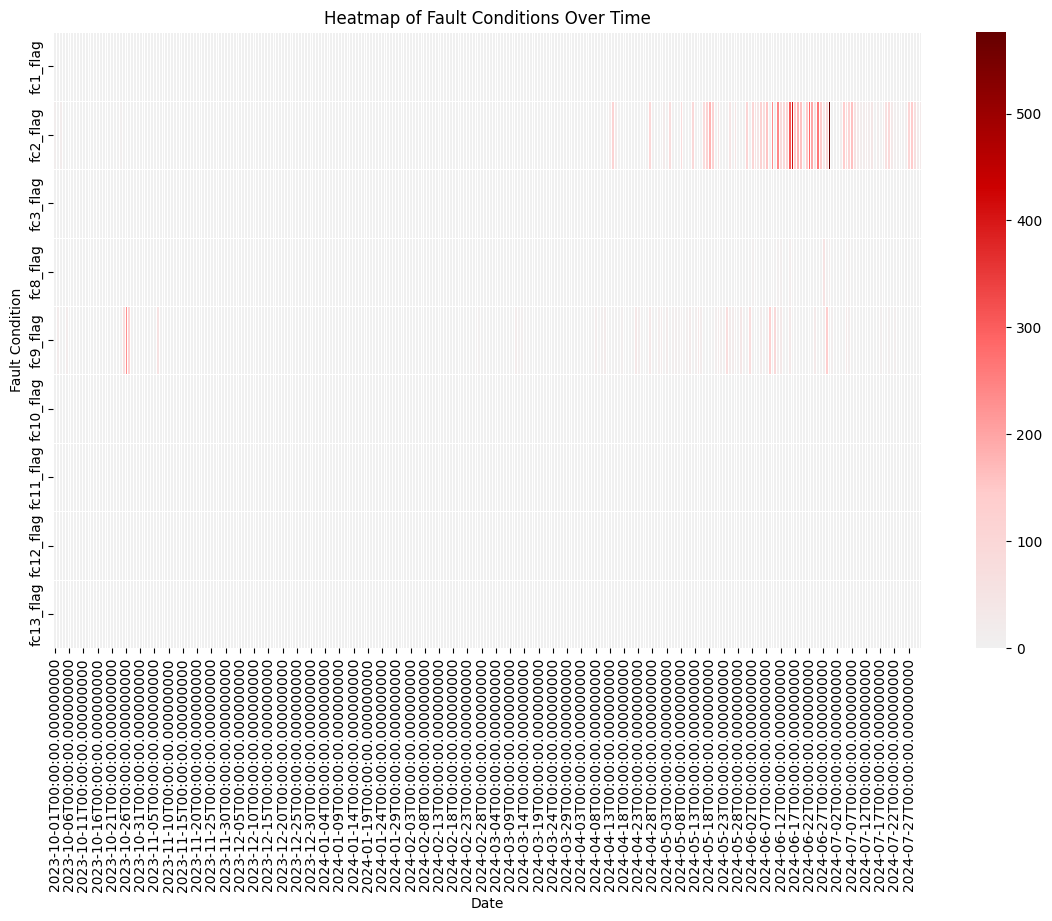

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Create a copy of df_combined
df_combined_copy = df.copy()

# Resample the data to daily intervals for a clearer heatmap
df_daily = df_combined_copy.resample('D').sum()

# Dynamically select only the fault sum columns (columns ending with '_flag')
fault_columns = [col for col in df_daily.columns if col.endswith('_flag') and 'hour_of_the_day' not in col]

# Subset the DataFrame to include only the fault columns
df_faults = df_daily[fault_columns]

# Transpose for better heatmap visualization
df_faults_t = df_faults.T

# Create a custom color map with more distinction for low values
colors = ["#f0f0f0", "#ffcccc", "#ff6666", "#cc0000", "#660000"]  # light gray to dark red
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# Plot heatmap using seaborn
plt.figure(figsize=(14, 8))
sns.heatmap(df_faults_t, cmap=cmap, cbar=True, linewidths=0.5)

plt.title('Heatmap of Fault Conditions Over Time')
plt.xlabel('Date')
plt.ylabel('Fault Condition')
plt.show()


# FC4

Remember FC4? This fault condition was treated separately because it involves resampled time series data to flag hunting behavior. A heatmap could be particularly insightful here, as it may reveal if hunting occurs more frequently at certain times of the year. This pattern could emerge if control systems have different PID tuning for various AHU operating states or modes.

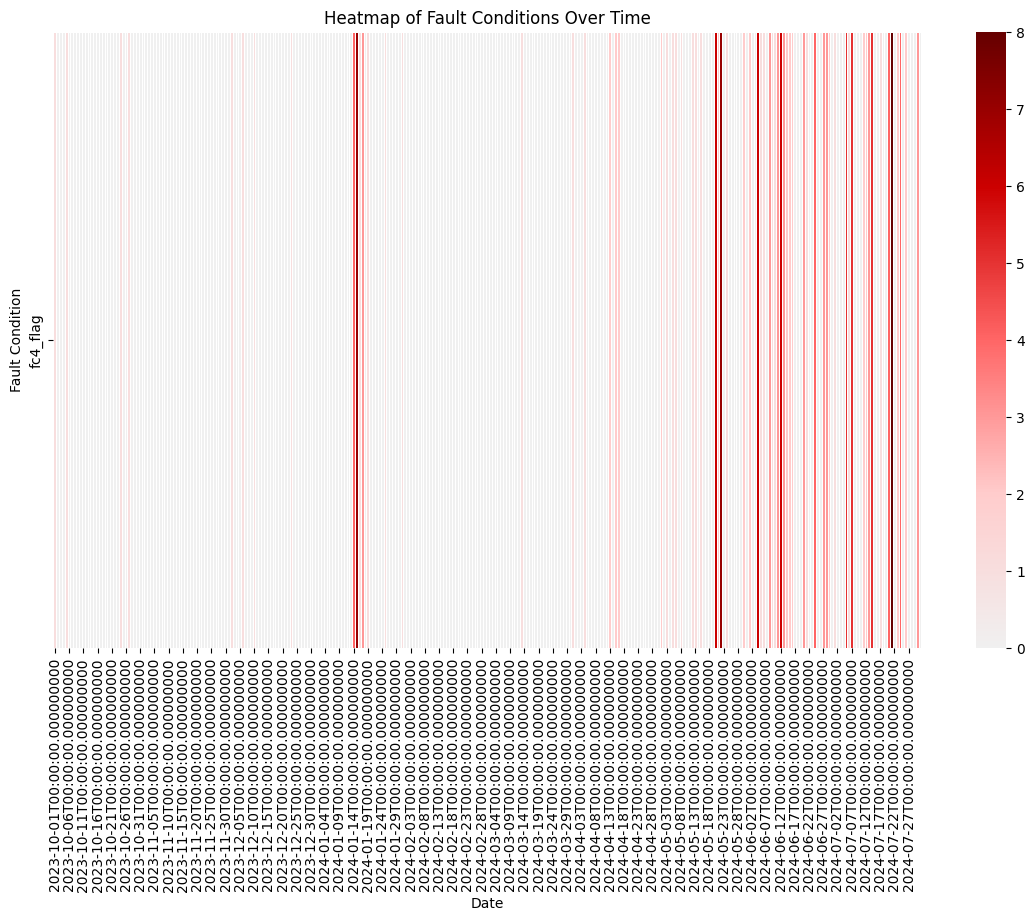

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Create a copy of df_combined
df_fc4_copy = df_fc4.copy()

# Resample the data to daily intervals for a clearer heatmap
df_daily = df_fc4_copy.resample('D').sum()

# Subset the DataFrame to include only the fault columns
df_faults = df_daily[['fc4_flag']]  # Keeping it as a DataFrame with double brackets

# Create a custom color map with more distinction for low values
colors = ["#f0f0f0", "#ffcccc", "#ff6666", "#cc0000", "#660000"]  # light gray to dark red
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# Plot heatmap using seaborn
plt.figure(figsize=(14, 8))
sns.heatmap(df_faults.T, cmap=cmap, cbar=True, linewidths=0.5)

plt.title('Heatmap of Fault Conditions Over Time')
plt.xlabel('Date')
plt.ylabel('Fault Condition')
plt.show()


Heat maps are effective tools for highlighting potential issues that may be influenced by the time of year, particularly for an AHU, where outdoor conditions significantly impact its operating mode. Some AHU programming may incorporate different PID tuning parameters for various operating states. While one mode might transition smoothly between mechanical cooling, economizing, or heating, improper tuning across all states can lead to oscillations or hunting, especially if adjustments were not made for each operating condition.

Similarly, as demonstrated in this example, when there is an overwhelming amount of data, it can be difficult to pinpoint specific issues. To address this, consider analyzing faults on a seasonal or monthly basis, which allows for a more focused examination and clearer identification of underlying problems.

For example you could do something along the lines of this below to create a smaller dataset to work with.

```python
# Create DataFrame
df = pd.DataFrame(data)

# Convert timestamp to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"])

# Set the timestamp as the index
df.set_index("timestamp", inplace=True)

# Example of breaking out the DataFrame by month
dfs_by_month = {month: data for month, data in df.groupby(df.index.to_period("M"))}

# Example of accessing the DataFrame for March 2023
march_df = dfs_by_month[pd.Period("2023-03")]

print("March 2023 DataFrame:")
print(march_df)
```